# 비어플 2주차 과제 - 따릉이 데이터 EDA
#### 2022110484 장윤서

## 변수 설명 





Date (날짜) : year-month-day

Rented Bike count (자전거 대여량) :Count of bikes rented at each hour

Hour (그 날의 시간) : Hour of he day (0-23) 

Temperature (온도) : Temperature in Celsius

Humidity (습도) : %

Windspeed (풍속) : m/s

Visibility (가시성) : 10m

Dew point temperature (이슬점 온도)  : Celsius

Solar radiation (태양 복사) : MJ/m2

Rainfall (강우량) : mm

Snowfall (강설량) : cm

Seasons (계절) :Winter, Spring, Summer, Autumn #범주형

Holiday (휴일) :Holiday/No holiday             #범주형 

Functional Day : Yes/No   #범주형



## 라이브러리 불러오기 

In [3]:
#라이브러리 임포트하기 
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.model_selection import train_test_split
%config InlineBackend.figure_format = 'retina'  #선명하게 만들기

## 데이터 불러오기 

In [4]:
df=pd.read_csv('C:/Users/jys72/code/비어플따릉이.csv',encoding='ISO-8859-1')

## EDA

In [5]:
df.head() # 앞의 5개 행 추출 

,Date,Rented Bike Count,Hour,Temperature(°C),Humidity(%),Wind speed (m/s),Visibility (10m),Dew point temperature(°C),Solar Radiation (MJ/m2),Rainfall(mm),Snowfall (cm),Seasons,Holiday,Functioning Day
0,01/12/2017,254,0,-5.2,37,2.2,2000,-17.6,0.0,0.0,0.0,Winter,No Holiday,Yes
1,01/12/2017,204,1,-5.5,38,0.8,2000,-17.6,0.0,0.0,0.0,Winter,No Holiday,Yes
2,01/12/2017,173,2,-6.0,39,1.0,2000,-17.7,0.0,0.0,0.0,Winter,No Holiday,Yes
3,01/12/2017,107,3,-6.2,40,0.9,2000,-17.6,0.0,0.0,0.0,Winter,No Holiday,Yes
4,01/12/2017,78,4,-6.0,36,2.3,2000,-18.6,0.0,0.0,0.0,Winter,No Holiday,Yes


In [27]:
df.tail()

,Date,Rented Bike Count,Hour,Temperature(°C),Humidity(%),Wind speed (m/s),Visibility (10m),Dew point temperature(°C),Solar Radiation (MJ/m2),Rainfall(mm),Snowfall (cm),Seasons,Holiday,Functioning Day
8755,30/11/2018,1003,19,4.2,34,2.6,1894,-10.3,0.0,0.0,0.0,Autumn,No Holiday,Yes
8756,30/11/2018,764,20,3.4,37,2.3,2000,-9.9,0.0,0.0,0.0,Autumn,No Holiday,Yes
8757,30/11/2018,694,21,2.6,39,0.3,1968,-9.9,0.0,0.0,0.0,Autumn,No Holiday,Yes
8758,30/11/2018,712,22,2.1,41,1.0,1859,-9.8,0.0,0.0,0.0,Autumn,No Holiday,Yes
8759,30/11/2018,584,23,1.9,43,1.3,1909,-9.3,0.0,0.0,0.0,Autumn,No Holiday,Yes


In [6]:
df.info()  
#결측치가 존재하지 않는다 
#Seasons, Holiday, Functioning Day 는  object 타입 

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8760 entries, 0 to 8759
Data columns (total 14 columns):
 #   Column                     Non-Null Count  Dtype  
---  ------                     --------------  -----  
 0   Date                       8760 non-null   object 
 1   Rented Bike Count          8760 non-null   int64  
 2   Hour                       8760 non-null   int64  
 3   Temperature(°C)            8760 non-null   float64
 4   Humidity(%)                8760 non-null   int64  
 5   Wind speed (m/s)           8760 non-null   float64
 6   Visibility (10m)           8760 non-null   int64  
 7   Dew point temperature(°C)  8760 non-null   float64
 8   Solar Radiation (MJ/m2)    8760 non-null   float64
 9   Rainfall(mm)               8760 non-null   float64
 10  Snowfall (cm)              8760 non-null   float64
 11  Seasons                    8760 non-null   object 
 12  Holiday                    8760 non-null   object 
 13  Functioning Day            8760 non-null   objec

In [7]:
df['Functioning Day'].unique()  # Functioning Day 변수는 Yes 와 No로 나타남

array(['Yes', 'No'], dtype=object)

In [8]:
df['Hour'].unique() #Hour 변수는 0-23시까지의 빌린 당일 시간을 나타냄 

array([ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15, 16,
       17, 18, 19, 20, 21, 22, 23], dtype=int64)

In [9]:
df.describe() 

,Rented Bike Count,Hour,Temperature(°C),Humidity(%),Wind speed (m/s),Visibility (10m),Dew point temperature(°C),Solar Radiation (MJ/m2),Rainfall(mm),Snowfall (cm)
count,8760.000000,8760.000000,8760.000000,8760.000000,8760.000000,8760.000000,8760.000000,8760.000000,8760.000000,8760.000000
mean,704.602055,11.500000,12.882922,58.226256,1.724909,1436.825799,4.073813,0.569111,0.148687,0.075068
std,644.997468,6.922582,11.944825,20.362413,1.036300,608.298712,13.060369,0.868746,1.128193,0.436746
min,0.000000,0.000000,-17.800000,0.000000,0.000000,27.000000,-30.600000,0.000000,0.000000,0.000000
25%,191.000000,5.750000,3.500000,42.000000,0.900000,940.000000,-4.700000,0.000000,0.000000,0.000000
50%,504.500000,11.500000,13.700000,57.000000,1.500000,1698.000000,5.100000,0.010000,0.000000,0.000000
75%,1065.250000,17.250000,22.500000,74.000000,2.300000,2000.000000,14.800000,0.930000,0.000000,0.000000
max,3556.000000,23.000000,39.400000,98.000000,7.400000,2000.000000,27.200000,3.520000,35.000000,8.800000


In [10]:
# 따릉이 대여량의 평균은 약 700대이며 
# 따릉이를 대여하는 평균 시간은 11시이다 

C:\Users\jys72\AppData\Local\Temp\ipykernel_25352\1403392056.py:3: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  sns.heatmap(df.corr(),annot=True)


Text(0.5, 1.0, 'correlation heatmap')

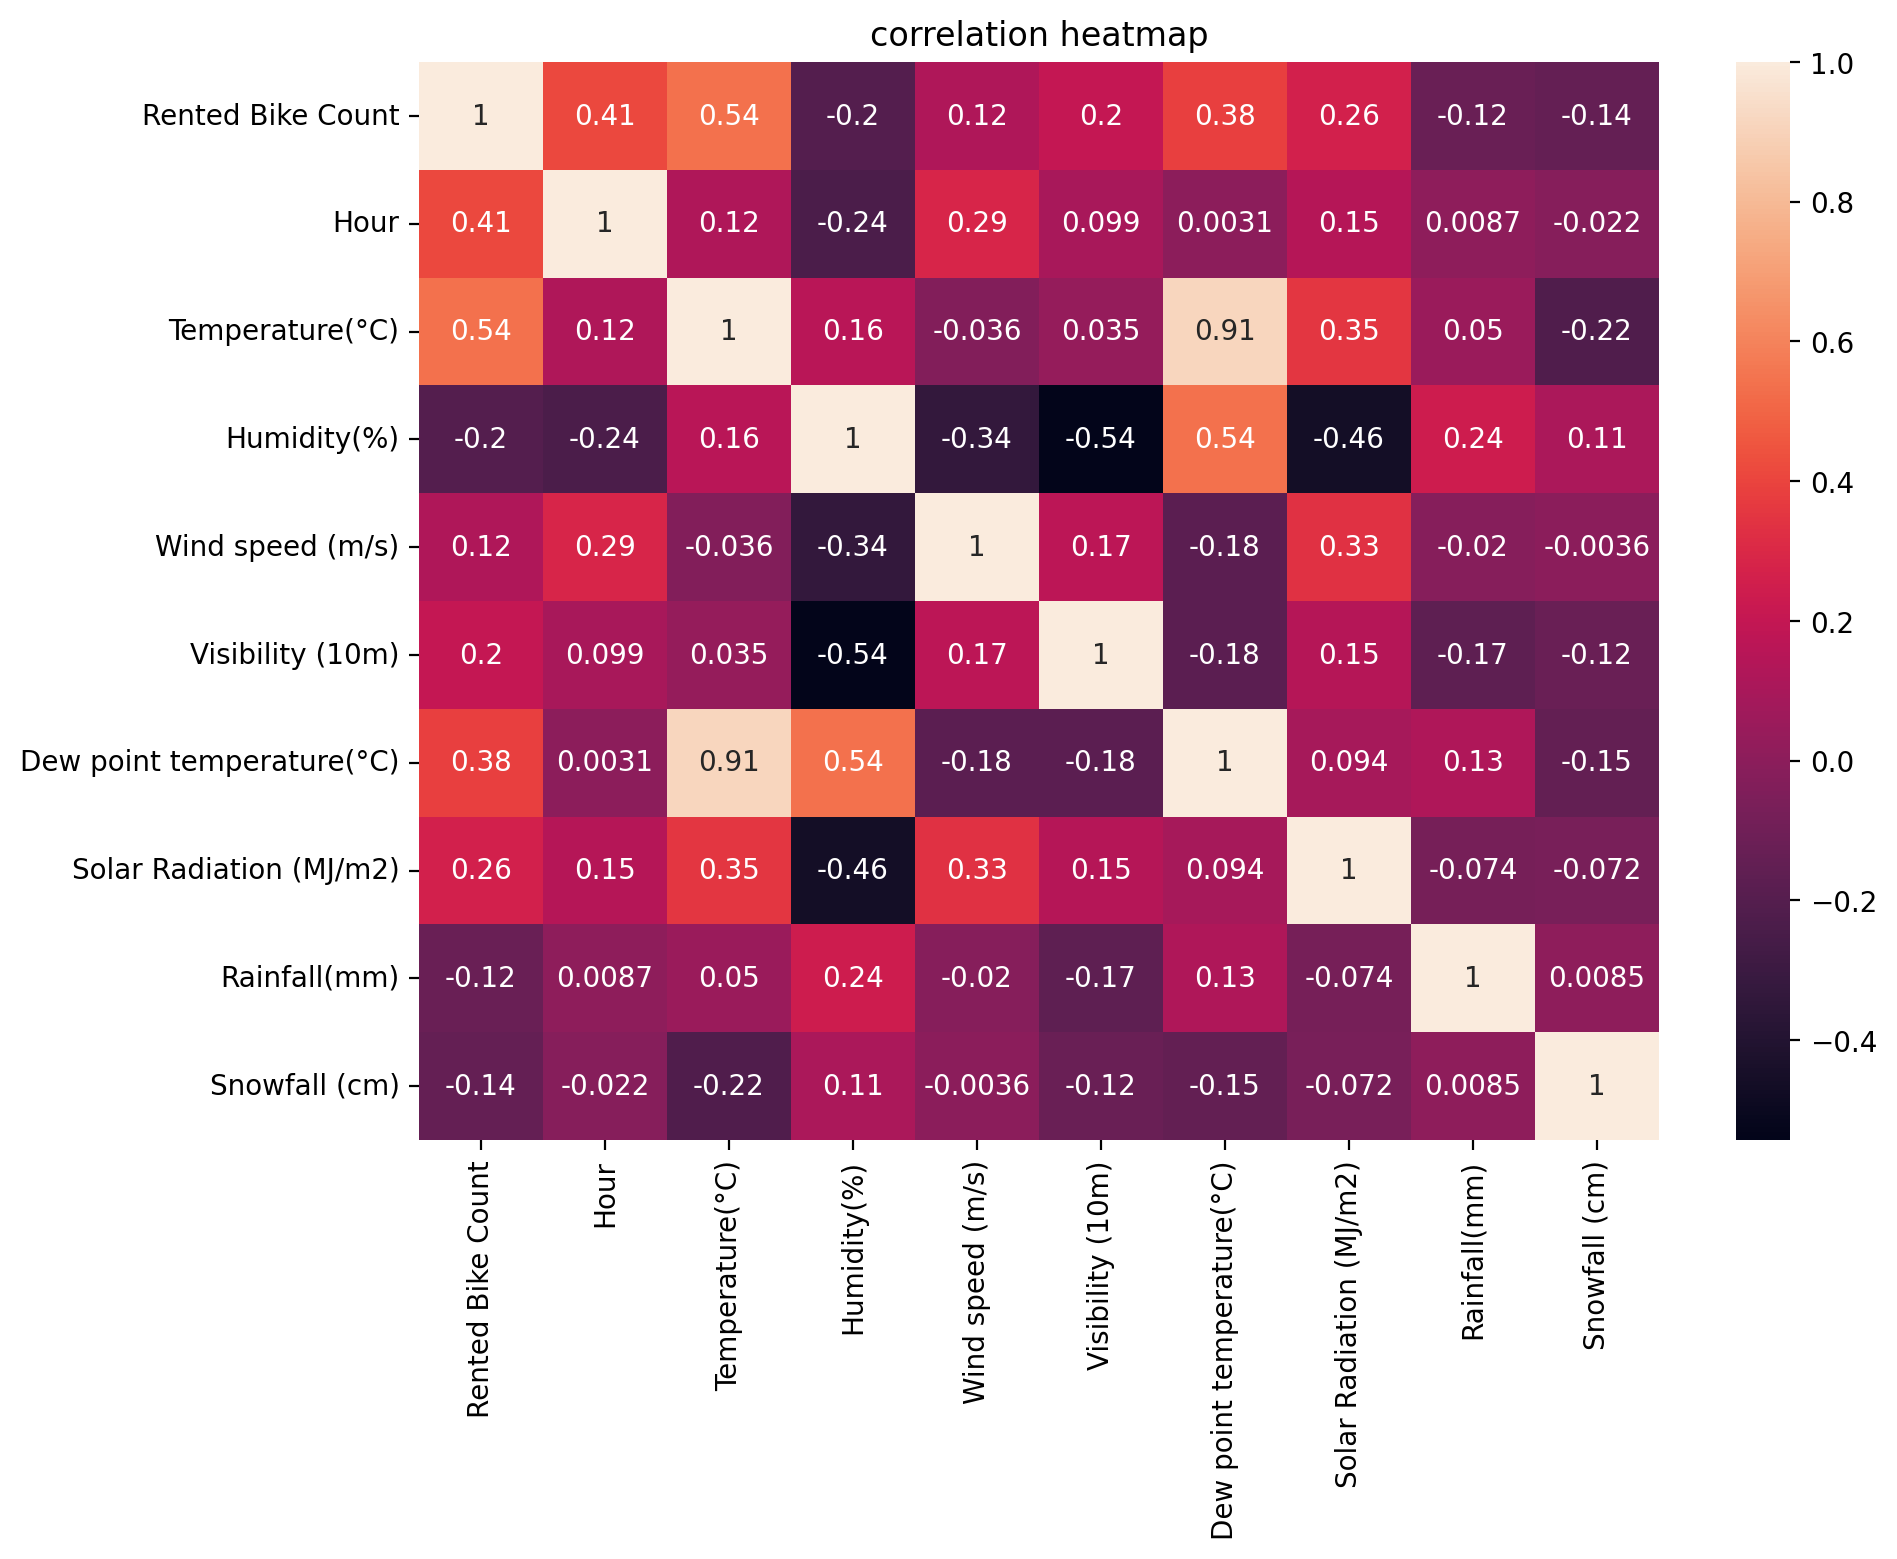

In [11]:
#변수별 상관관계 살펴보기 
plt.figure(figsize=(10,7))
sns.heatmap(df.corr(),annot=True)
plt.title('correlation heatmap') #상관계수 행렬 히트맵

#### 온도와 따릉이 대여량간의 상관관계가 0.54로 높게 나타난다 
#### 그 다음으로는 시간대가 0.41로 높은 상관관계를 가진다

## 예측 변수 : Rented Bike Count

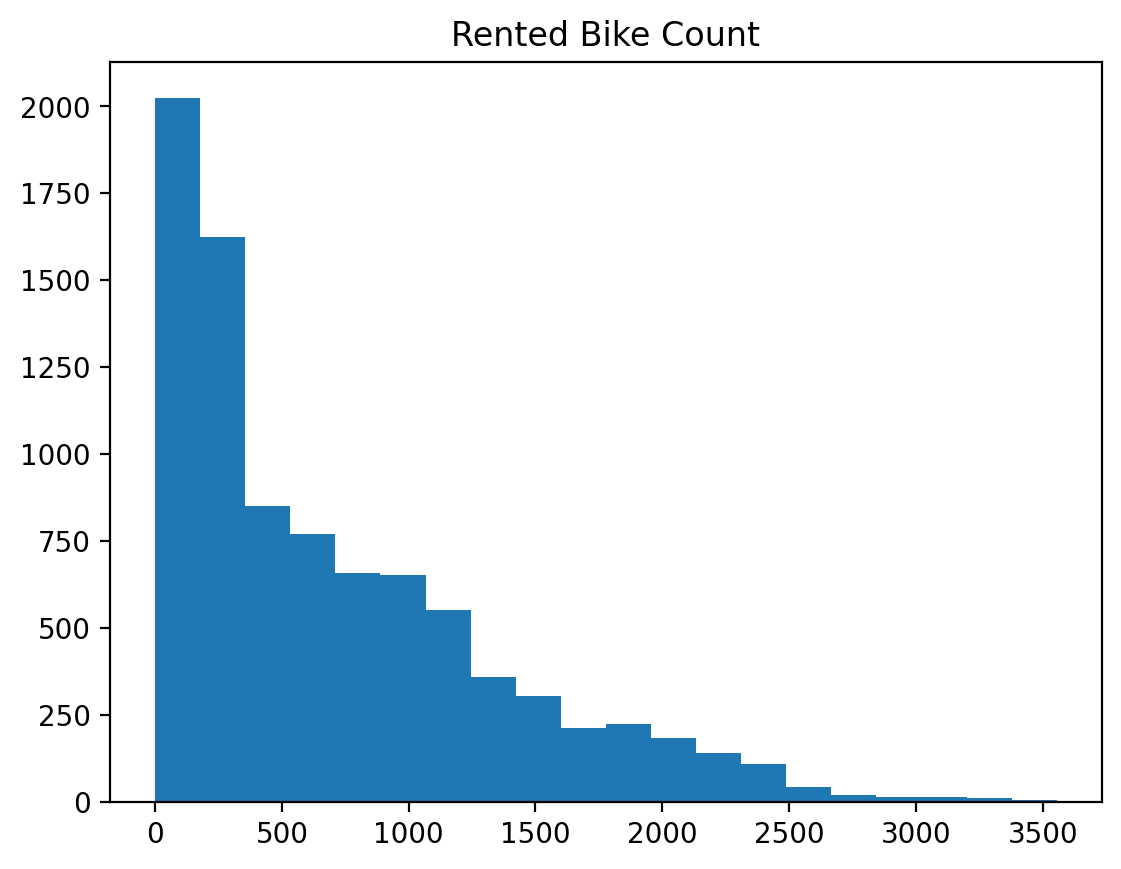

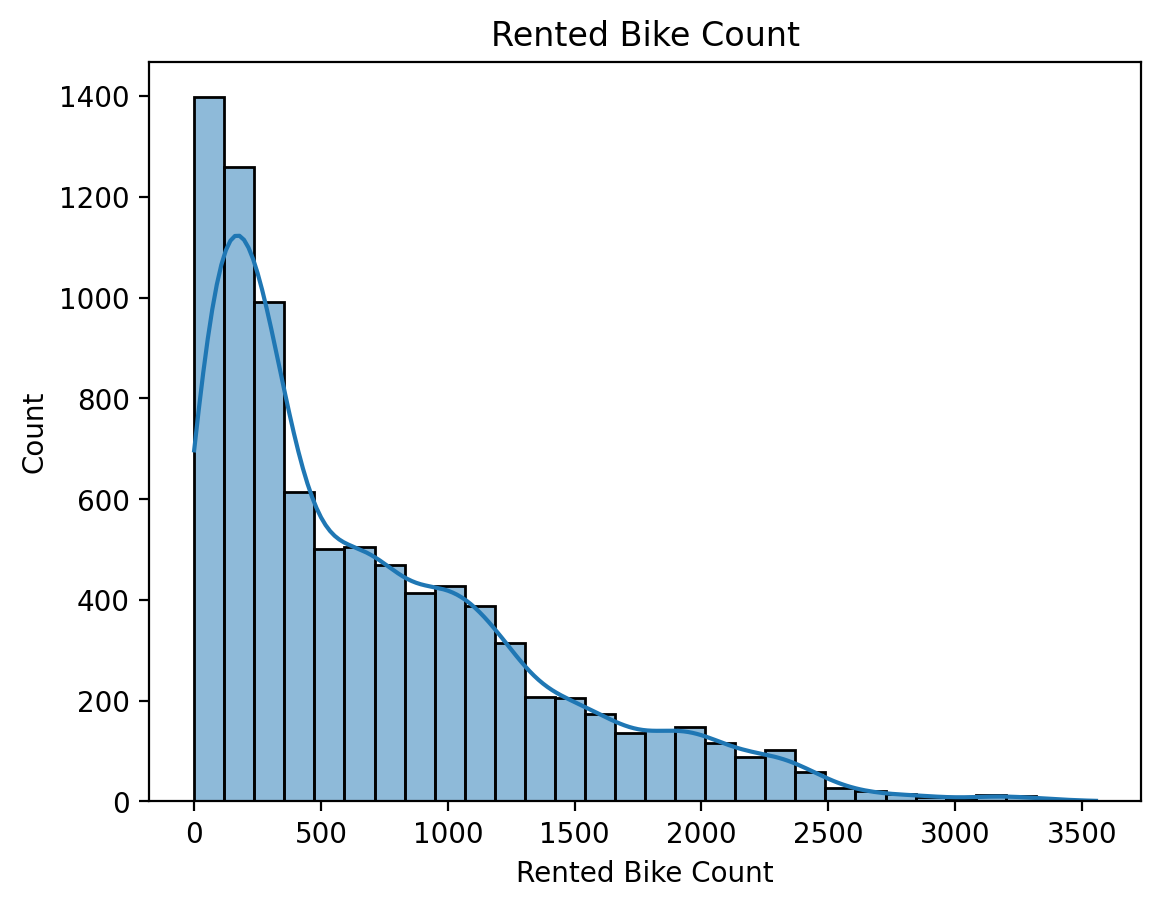

In [12]:
#히스토그램으로 나타내보기 
plt.hist(df['Rented Bike Count'],bins=20)
plt.title('Rented Bike Count')
plt.show()

sns.histplot(df['Rented Bike Count'],bins=30,kde=True)
plt.title('Rented Bike Count',fontsize=12)
plt.show()


Text(0.5, 1.0, 'Rented Bike Count')

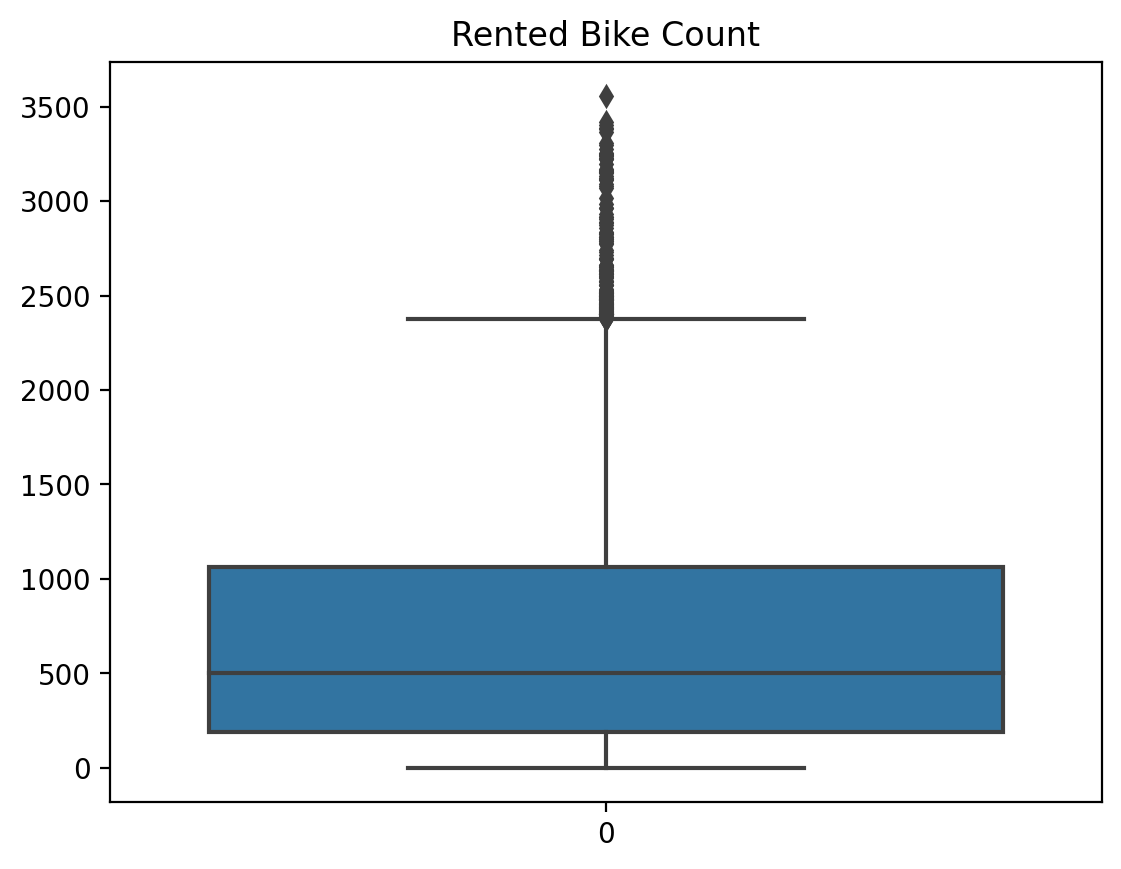

In [13]:
#박스플롯으로 나타내보기 
sns.boxplot(df['Rented Bike Count'])
plt.title('Rented Bike Count')

## 온도 변수
##### 가설: 온도가 높을 수록 따릉이 대여량은 증가할 것이다 ( 상관계수가 0.54 )

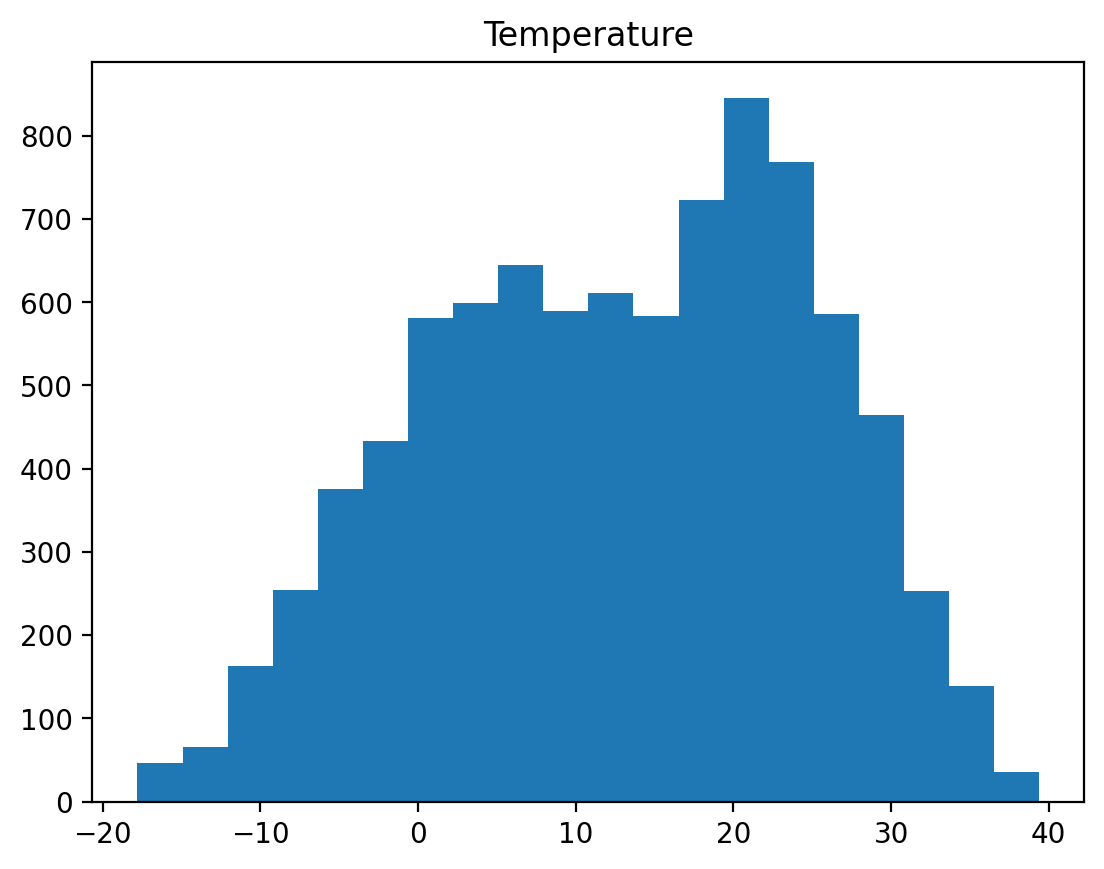

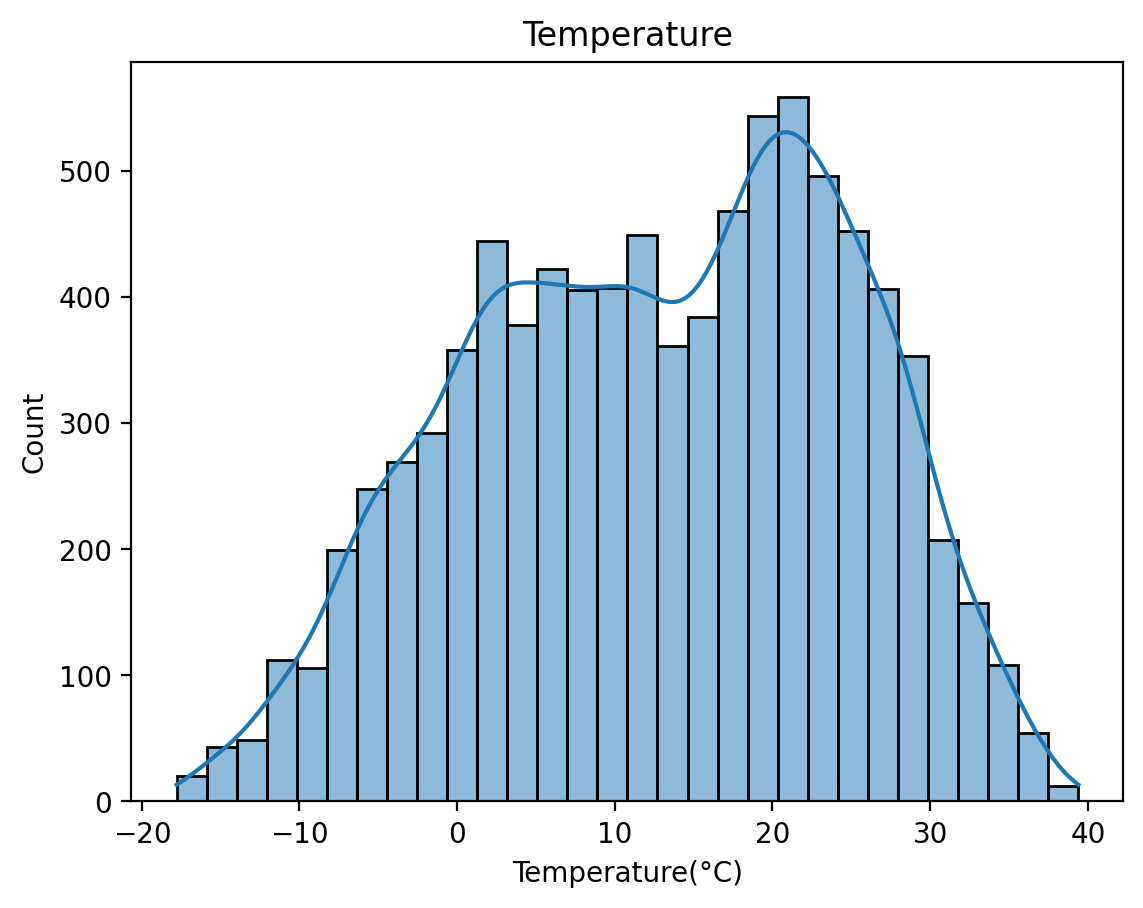

In [22]:
#온도 변수의 히스토그램을 통해서 살펴보기 
plt.hist(df['Temperature(°C)'],bins=20)
plt.title('Temperature')
plt.show()
#
sns.histplot(df['Temperature(°C)'], bins=30 ,kde=True )
plt.title('Temperature')
plt.show()

## 습도 변수

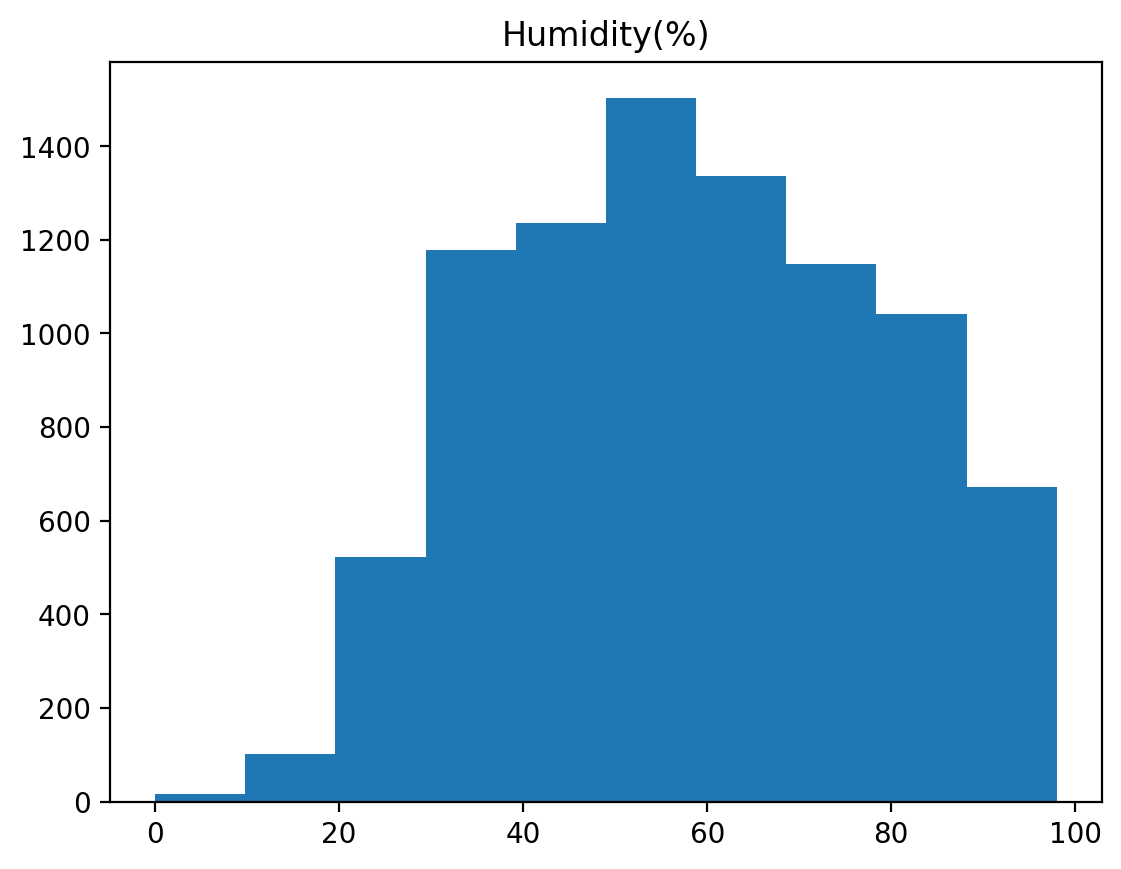

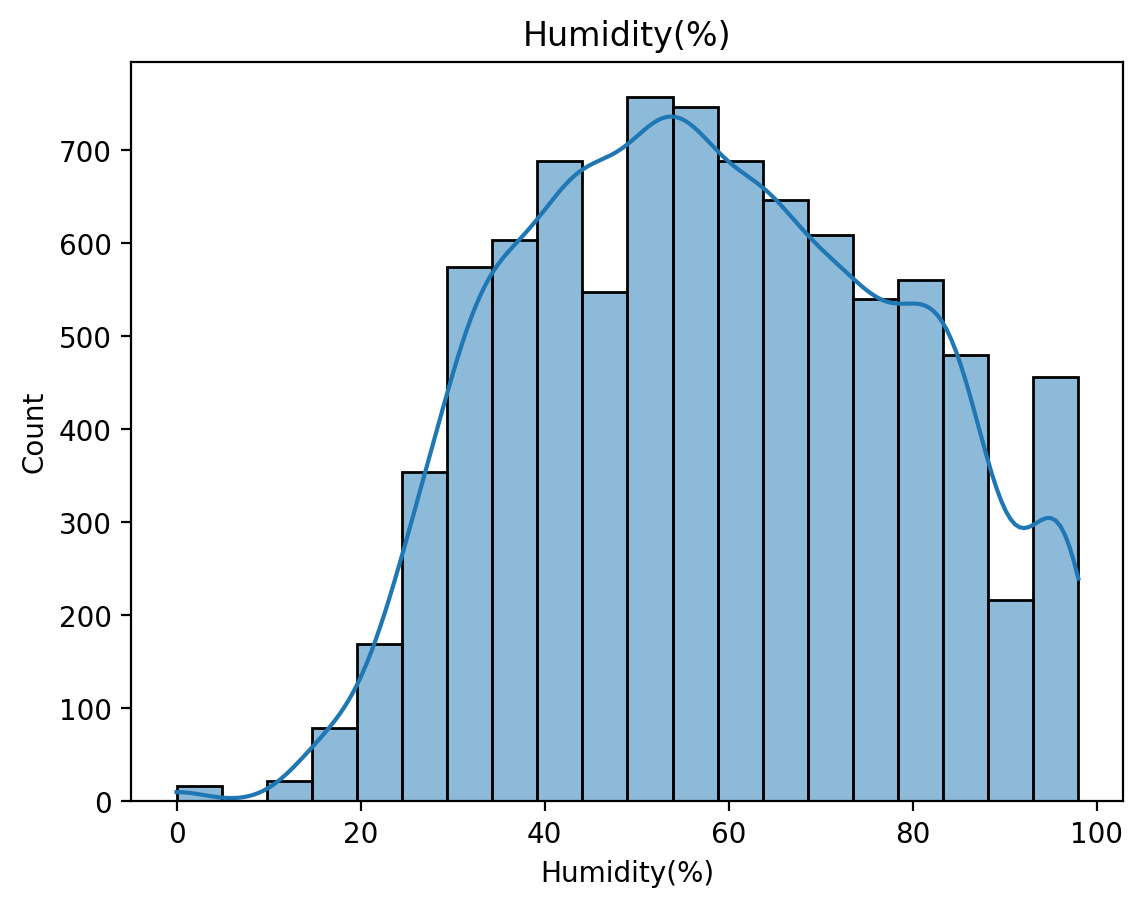

In [14]:
# 습도 변수 히스토그램으로 나타내기 
plt.hist(df['Humidity(%)'])
plt.title('Humidity(%)')
plt.show()

sns.histplot(df['Humidity(%)'], kde=True , bins=20)
plt.title('Humidity(%)')
plt.show()

Text(0.5, 1.0, 'Humidity(%)')

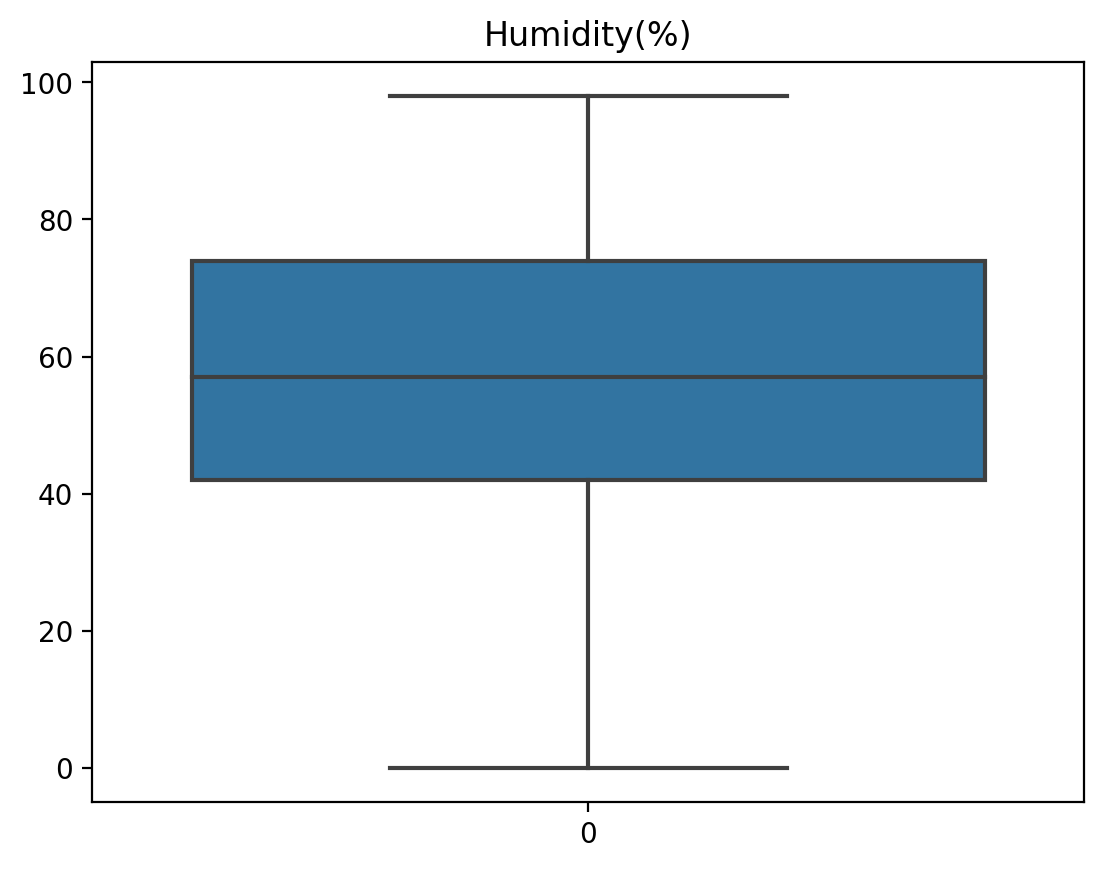

In [20]:
#습도변수를 박스플롯으로 나타내보기 
sns.boxplot(df['Humidity(%)'])
plt.title('Humidity(%)')

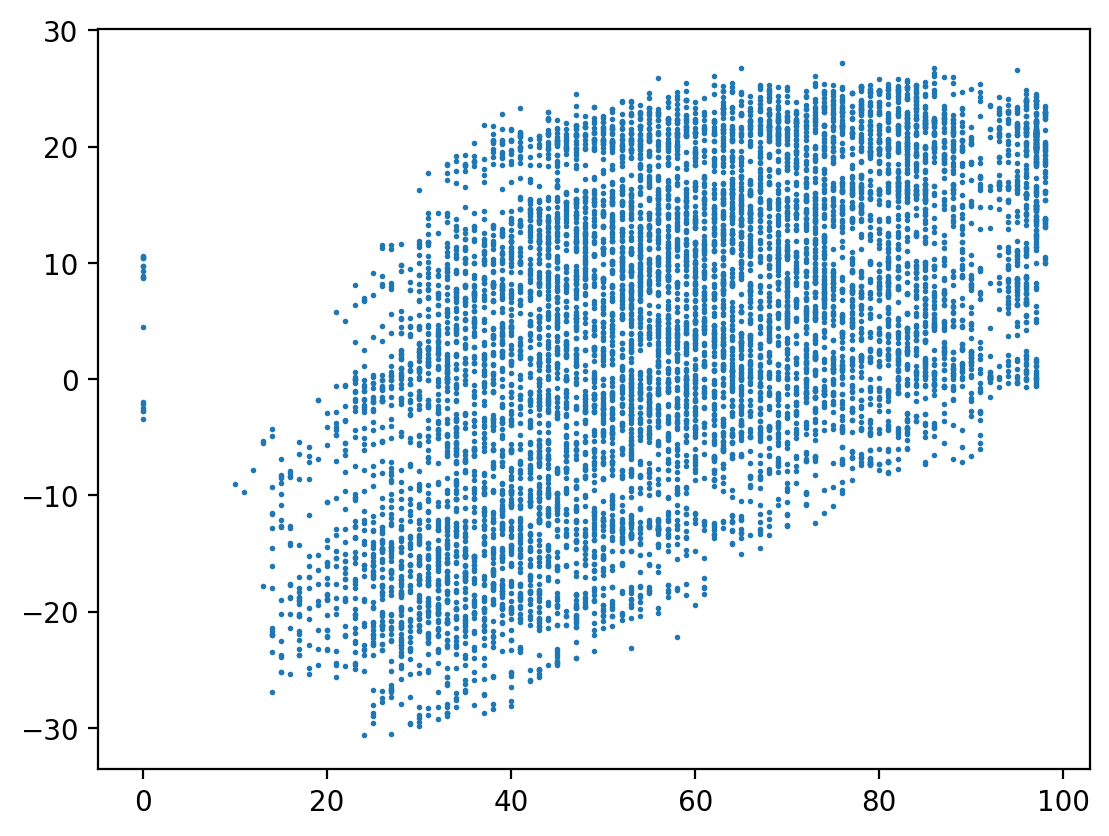

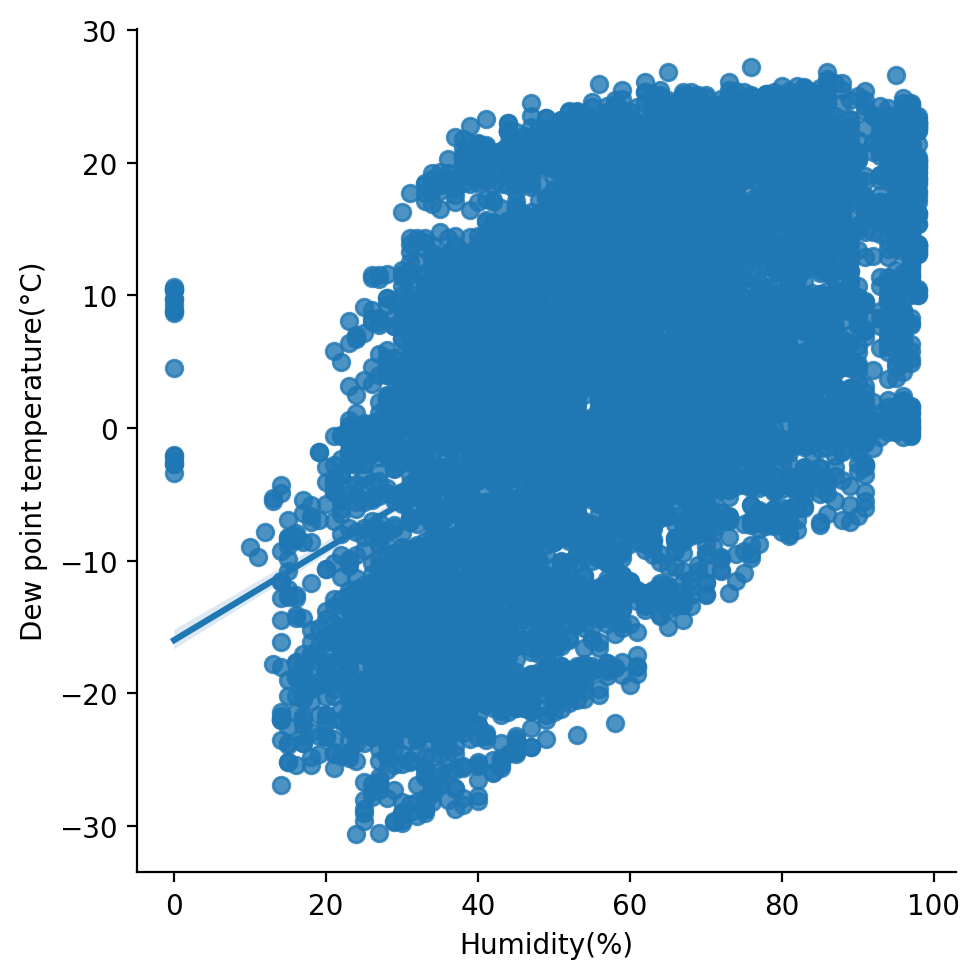

In [29]:
#습도변수와 이슬점 온도와의 상관관계가 0.54 이므로 양의 상관관계가 있을 것으로 추정됨

# 습도변수와 이슬점 온도와의 상관관계 구해보기 - 산점도 그리기 
plt.scatter(df['Humidity(%)'],df['Dew point temperature(°C)'],s=1)
plt.show()

# 회귀직선 그려보기 
sns.lmplot(x='Humidity(%)',y='Dew point temperature(°C)',data=df)
plt.show()

## 가시성 변수

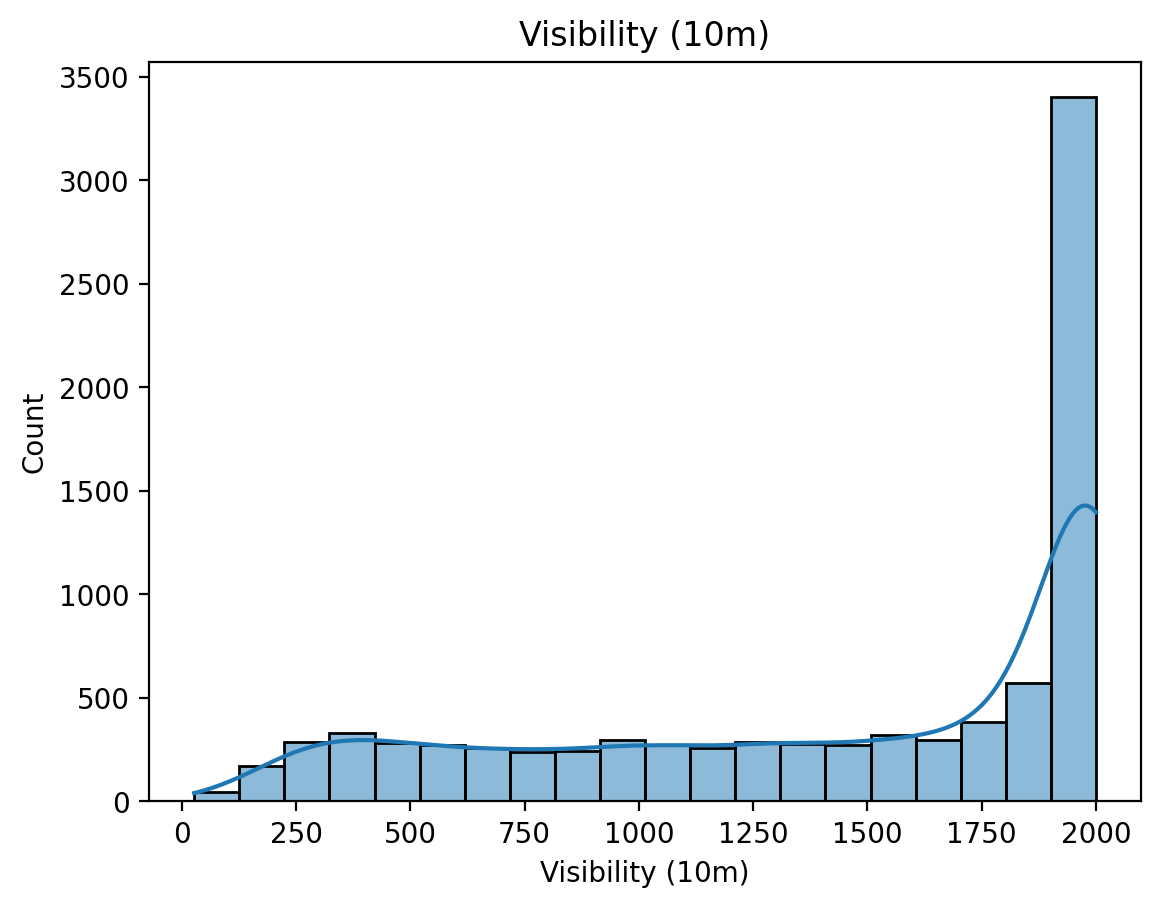

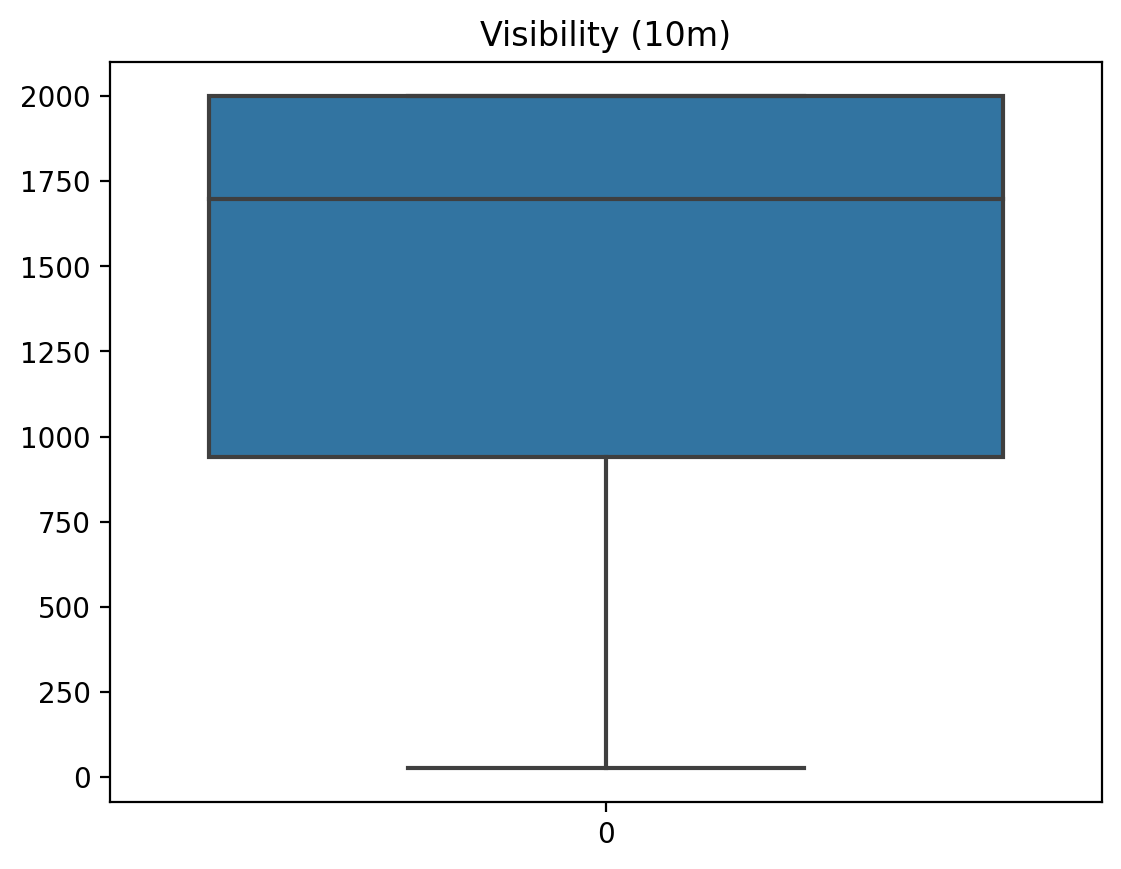

In [35]:
#가시성 변수-히스토그램 
sns.histplot(df['Visibility (10m)'],kde=True)
plt.title('Visibility (10m)')
plt.show()

#가시성 변수- 박스플롯
sns.boxplot(df['Visibility (10m)'])
plt.title('Visibility (10m)')
plt.show()


## 풍속 변수 

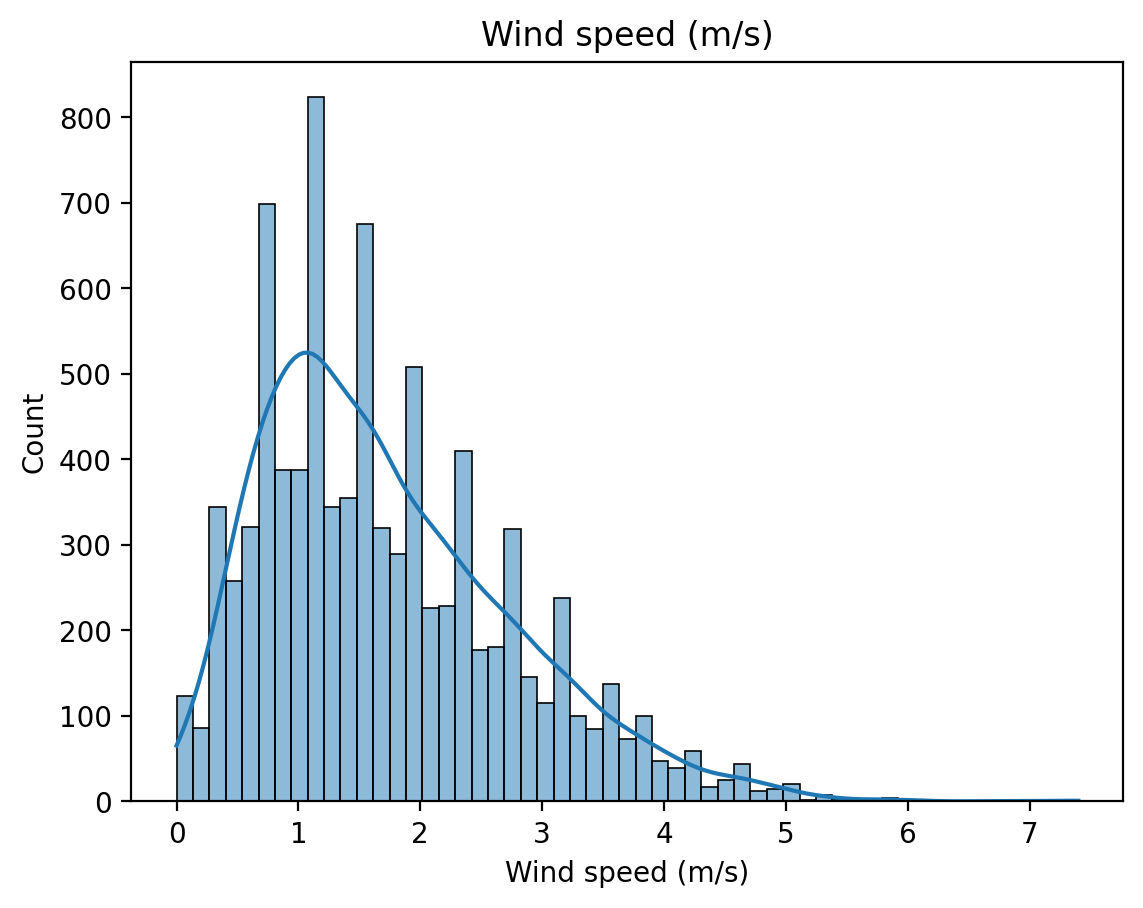

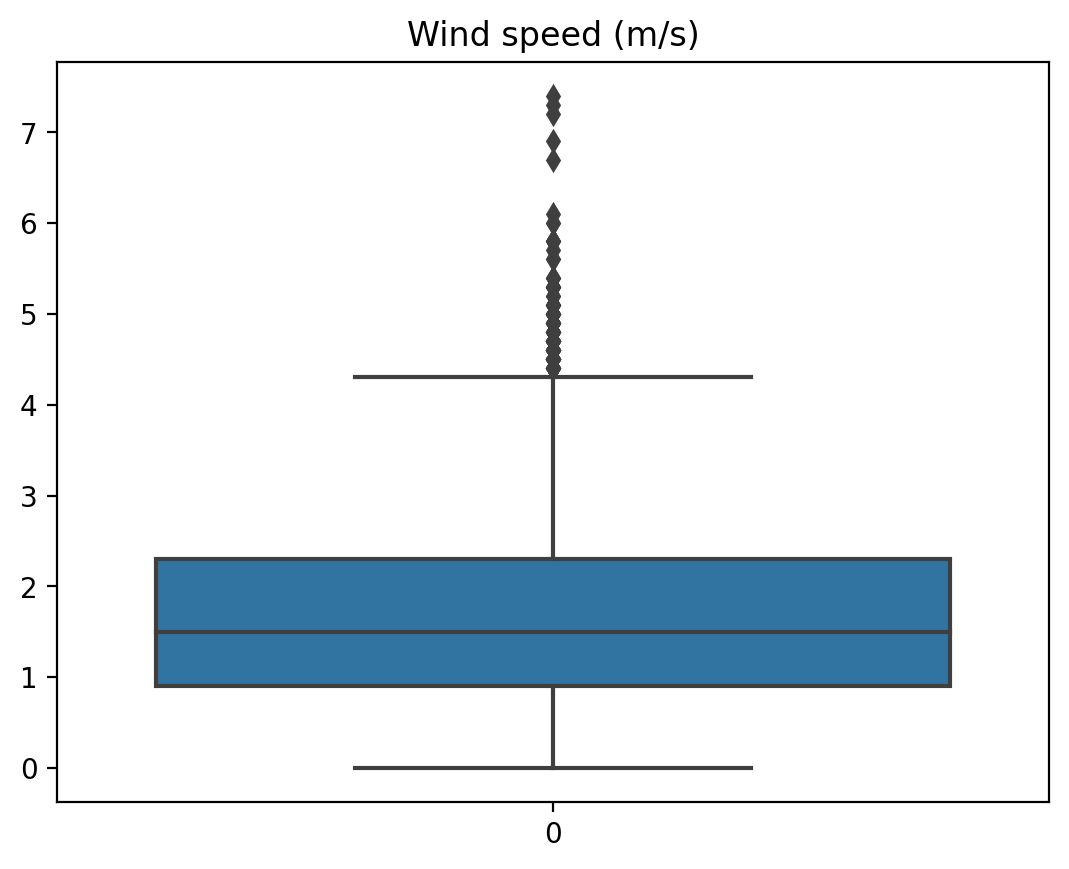

In [50]:
#풍속 변수-히스토그램 
sns.histplot(df['Wind speed (m/s)'],kde=True)
plt.title('Wind speed (m/s)')
plt.show()

#풍속 변수- 박스플롯
sns.boxplot(df['Wind speed (m/s)'])
plt.title('Wind speed (m/s)')
plt.show()

## 태양복사에너지 변수 

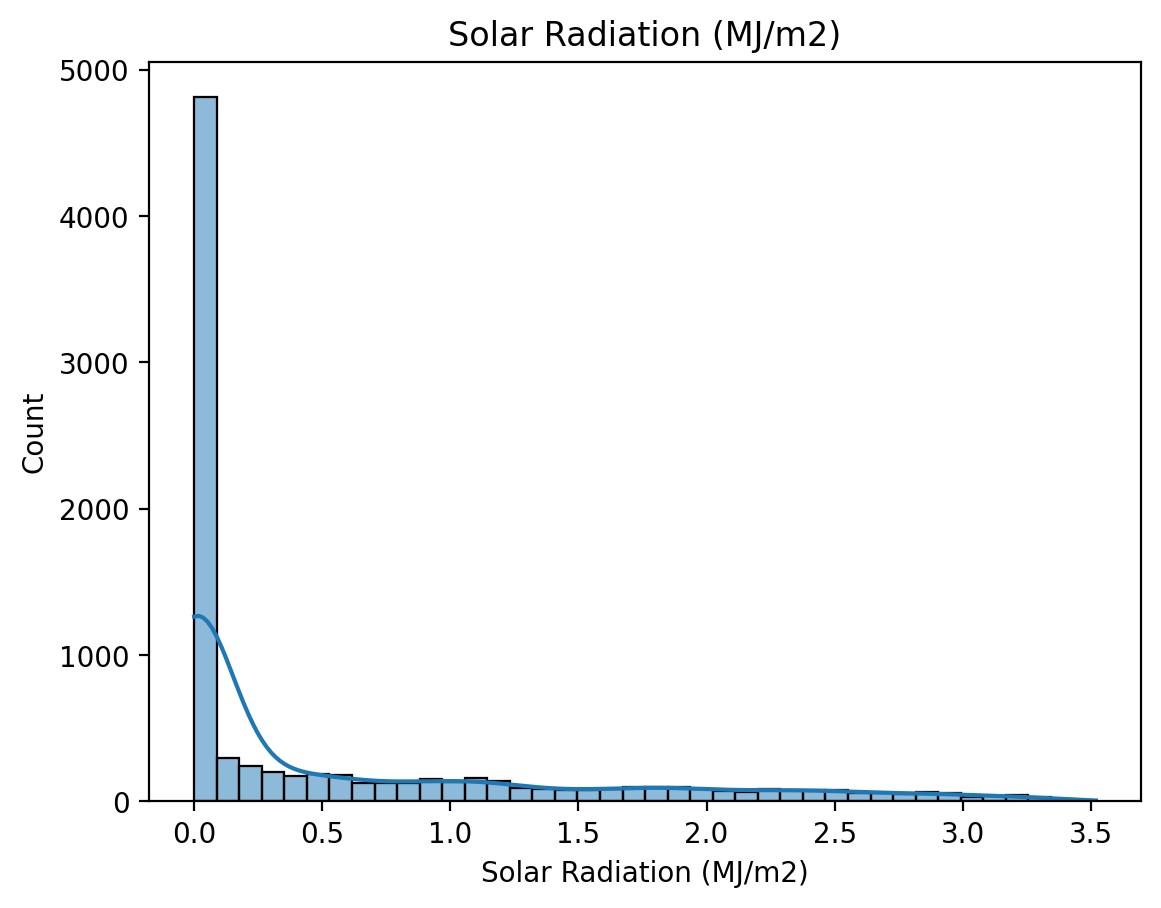

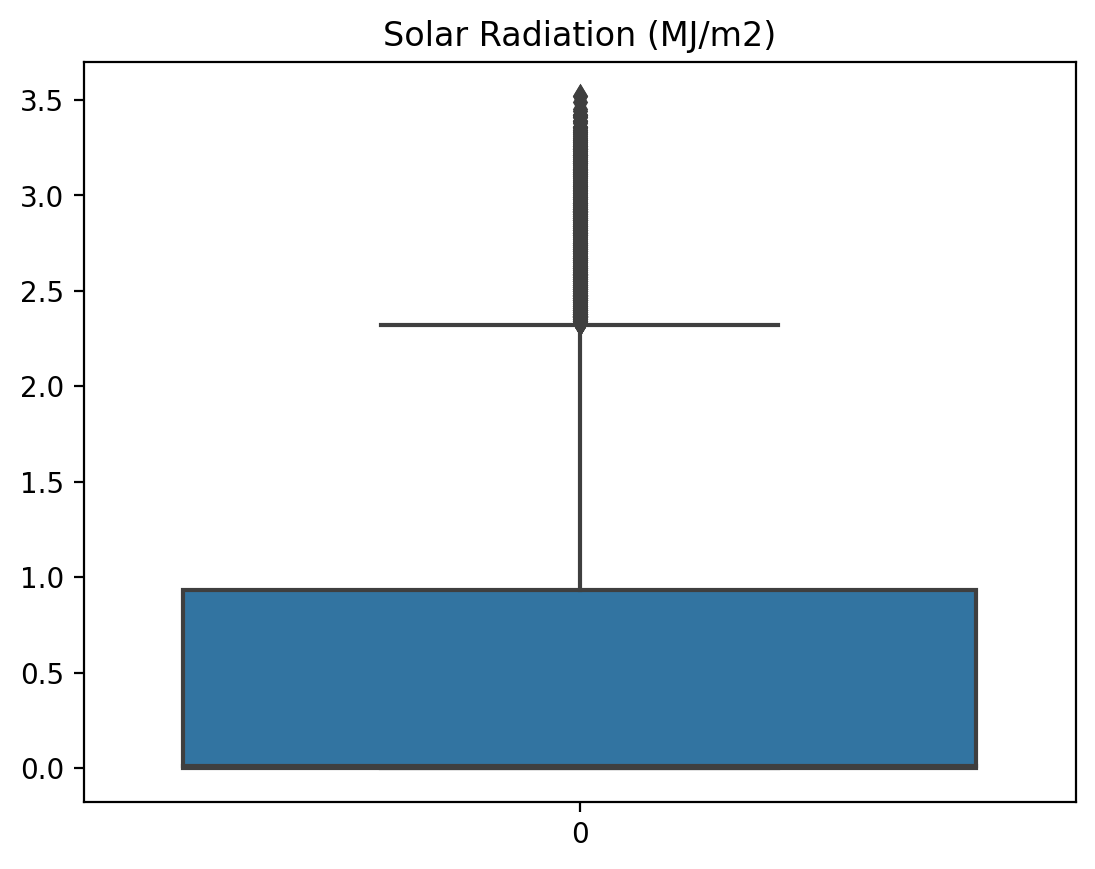

In [48]:
#태양복사에너지-히스토그램 
sns.histplot(df['Solar Radiation (MJ/m2)'],kde=True)
plt.title('Solar Radiation (MJ/m2)')
plt.show()

#태양복사에너지- 박스플롯
sns.boxplot(df['Solar Radiation (MJ/m2)'])
plt.title('Solar Radiation (MJ/m2)')
plt.show()

## 강우량 변수 

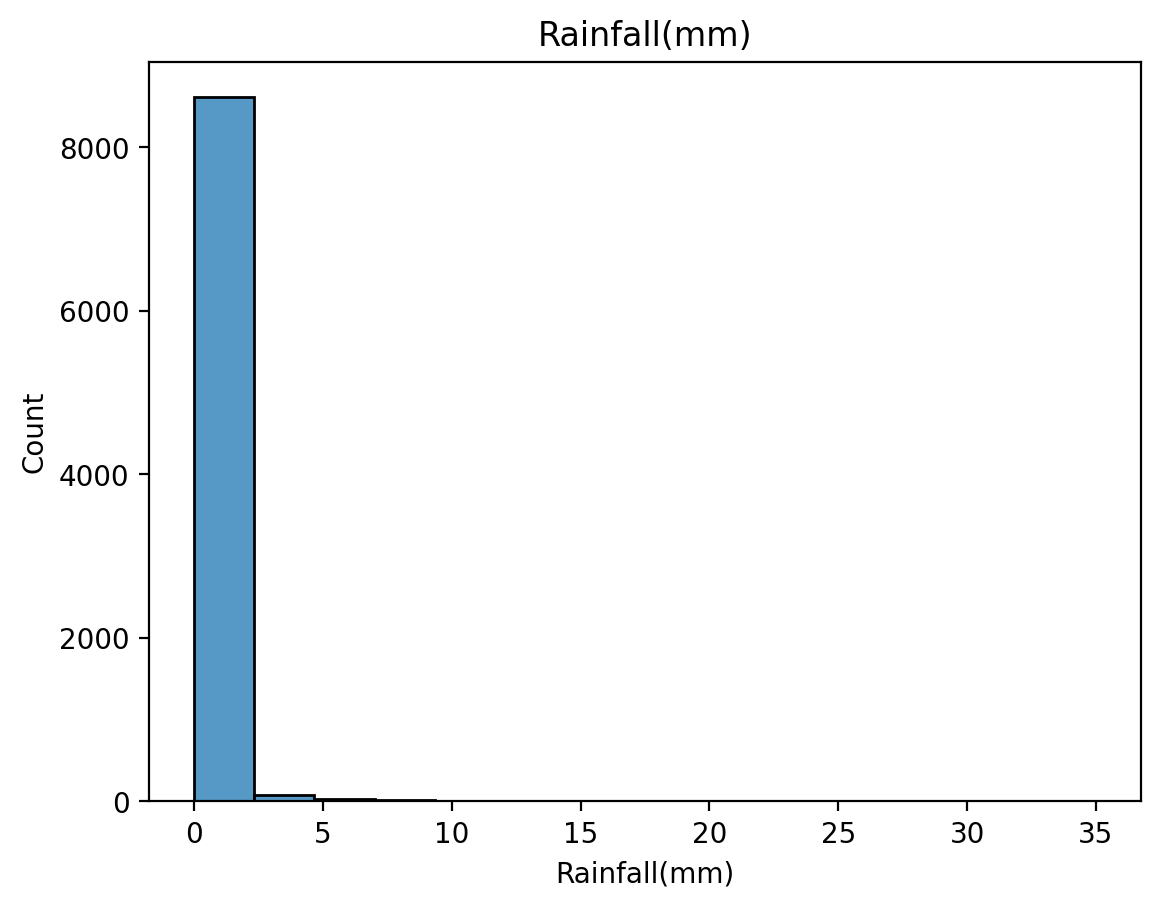

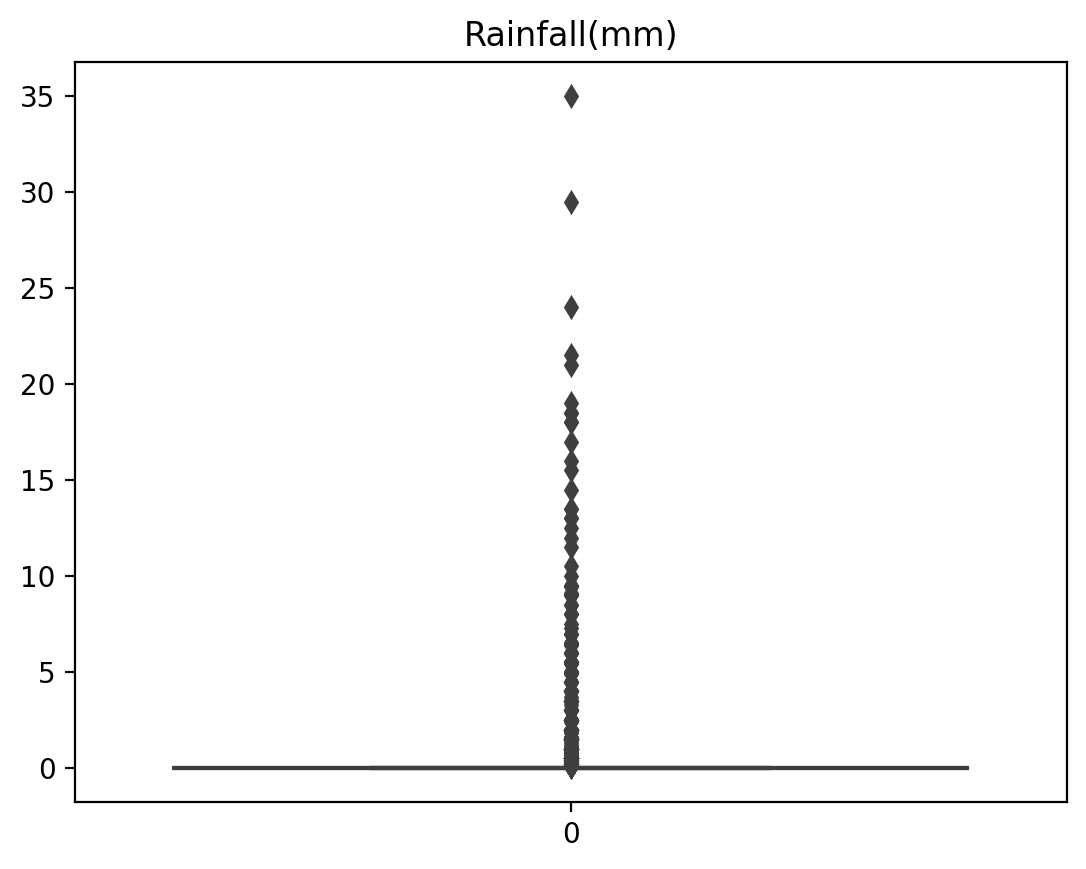

In [60]:
#강우량 변수-히스토그램 
sns.histplot(df['Rainfall(mm)'])
plt.title('Rainfall(mm)')
plt.show()

#강우량 변수- 박스플롯
sns.boxplot(df['Rainfall(mm)'])
plt.title('Rainfall(mm)')
plt.show()

## 강설량 변수

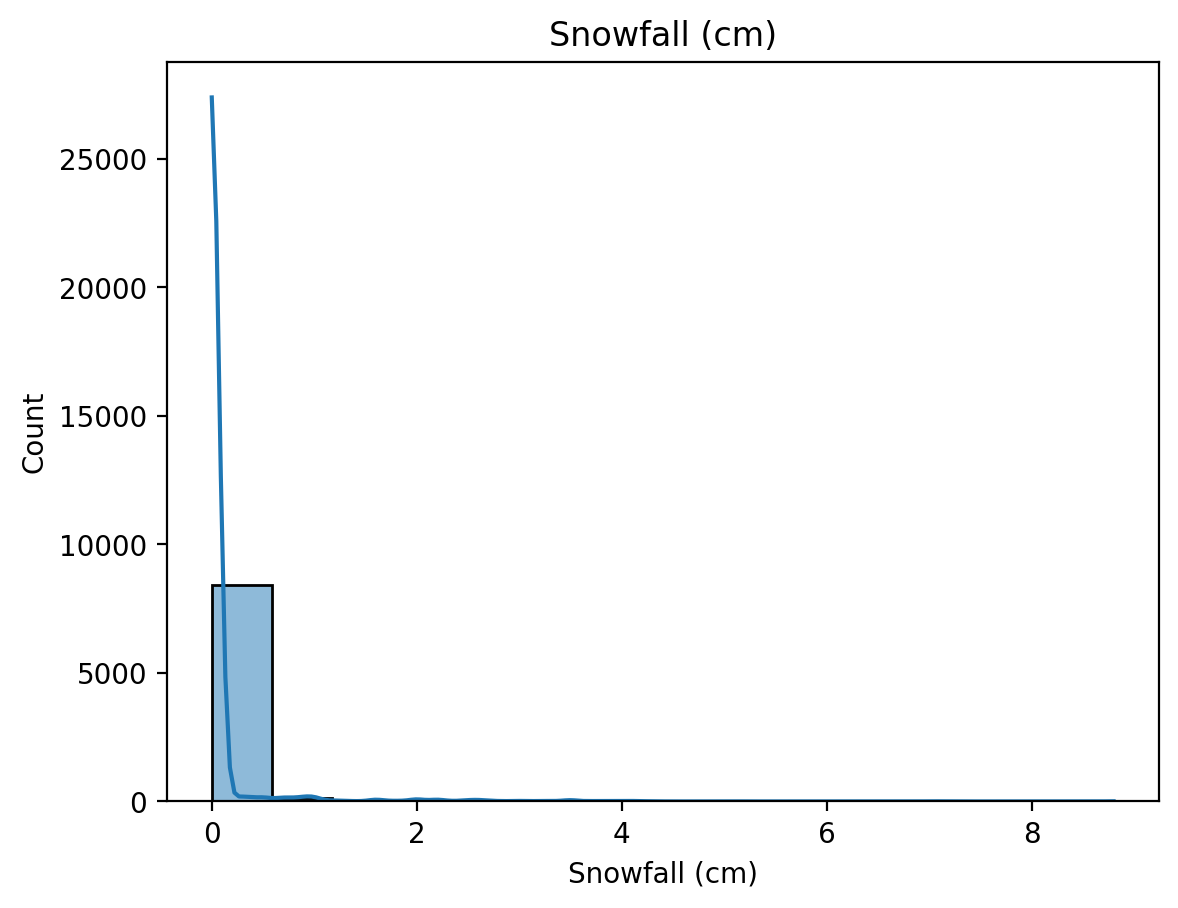

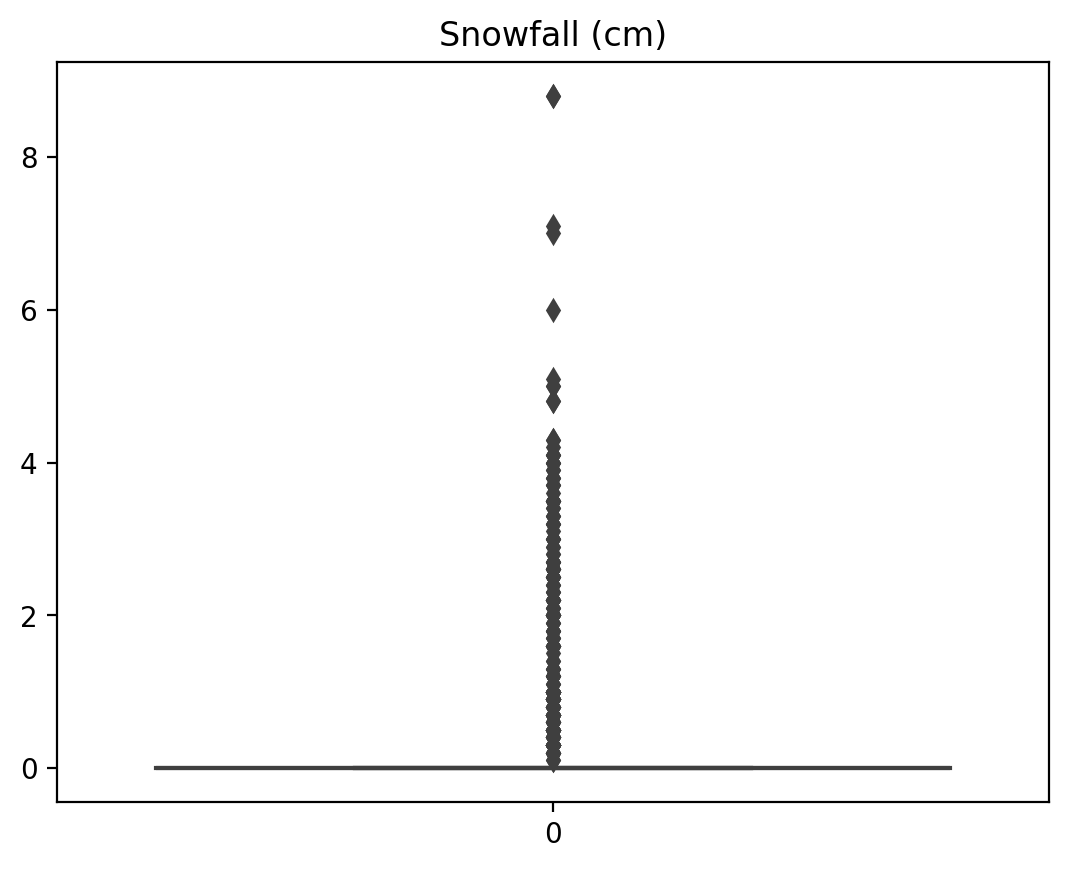

In [61]:
#강설량 변수-히스토그램 
sns.histplot(df['Snowfall (cm)'],kde=True)
plt.title('Snowfall (cm)')
plt.show()

#강설량 변수- 박스플롯
sns.boxplot(df['Snowfall (cm)'])
plt.title('Snowfall (cm)')
plt.show()

## 시간대 변수

시간대 나누기

Morining:6-12

Afternoon:13-18 

Evening:19-23

LateNight:24-5


Morning      2555
LateNight    2190
Afternoon    2190
Evening      1825
Name: hourcat, dtype: int64


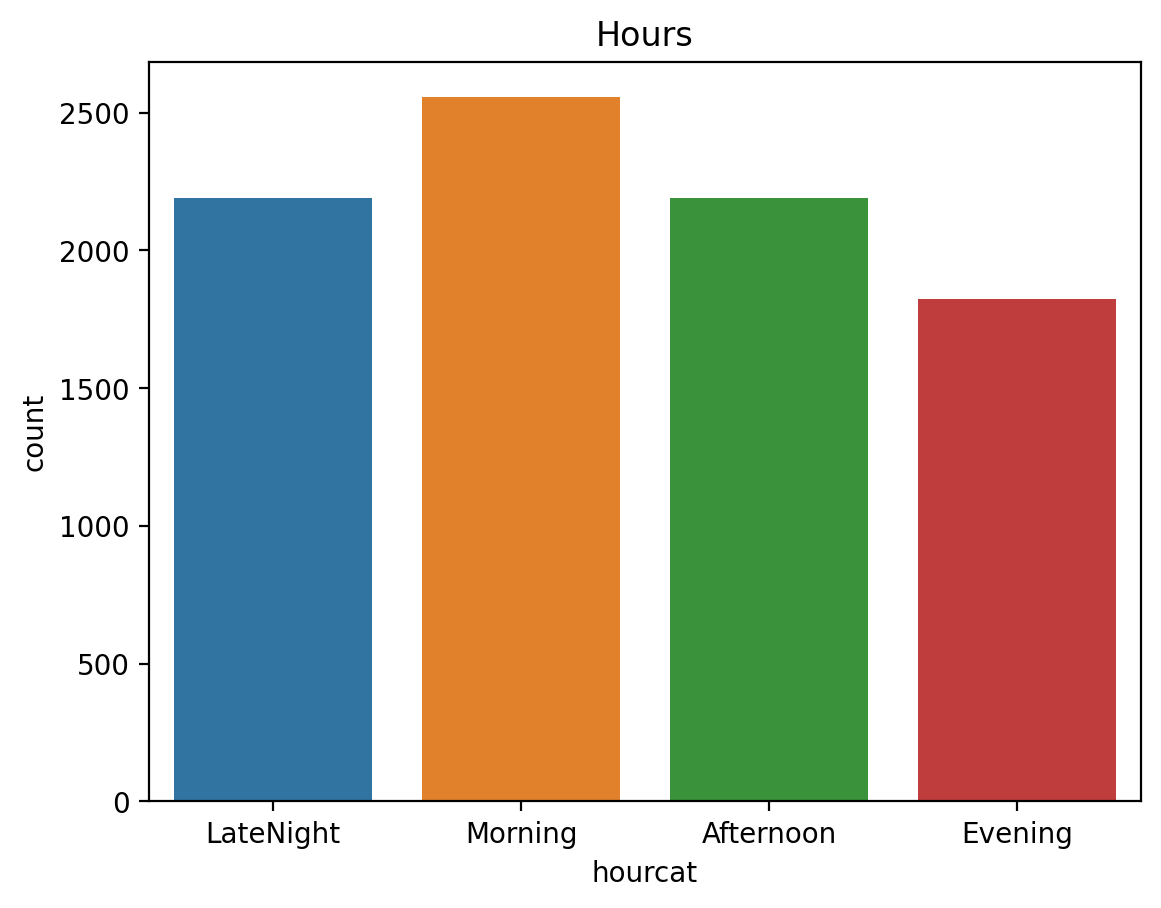

In [65]:
#시간대에 따른 따릉이 대여량의 박스플롯 그리기 

#시간대 나누기 
category=['LateNight','Morning','Afternoon','Evening'] # 시간대 나눌 카테고리 설정하기 
hourcat=pd.cut(x=df['Hour'],bins=[0,6,13,19,24],labels=category, right=False) #시간대 나누기 
df['hourcat']=hourcat #데이터 프레임에 새로운 열 생성하기 

#각 시간대 별 개수 
print(df['hourcat'].value_counts()) 
sns.countplot(x=df['hourcat'])
plt.title('Hours')
plt.show()

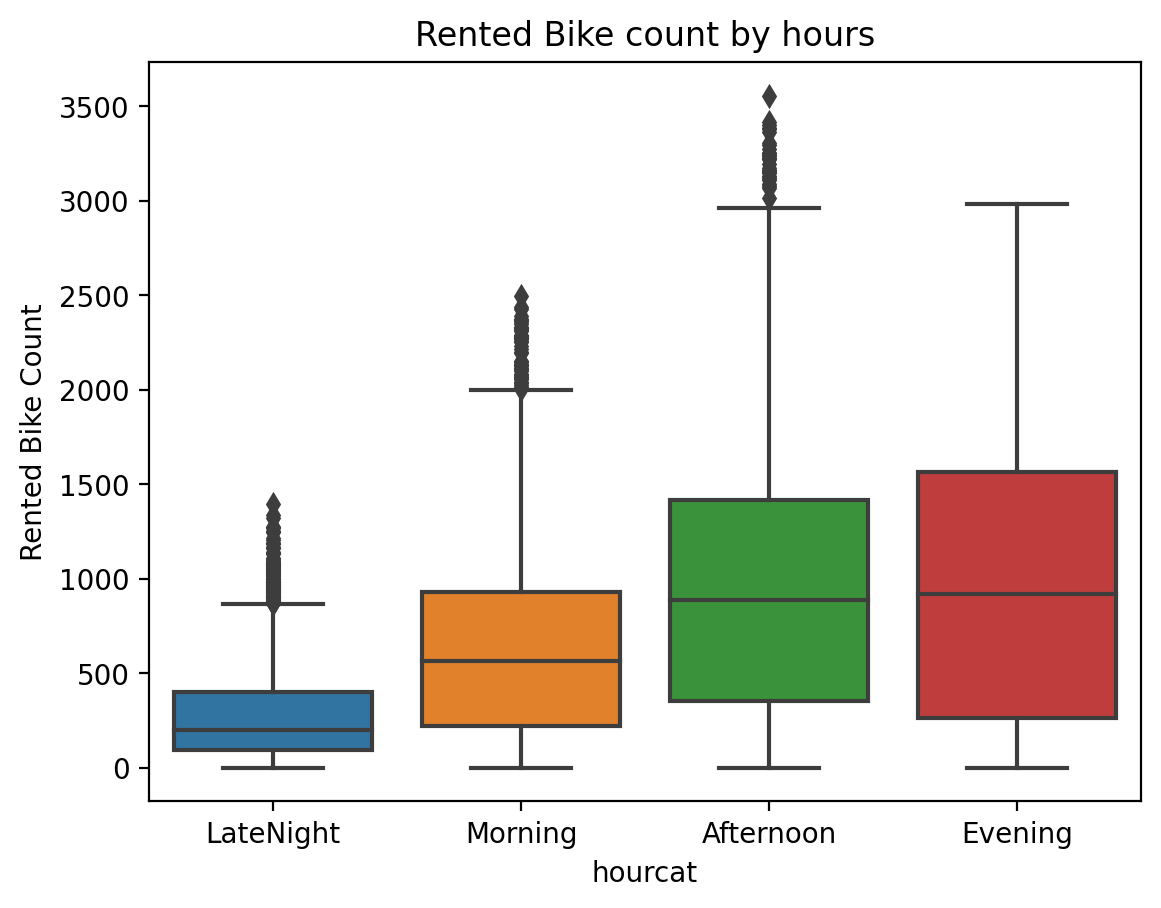

In [47]:
#시간대에 따른 따릉이 대여량 박스플롯 그리기 
sns.boxplot(x=df['hourcat'], y=df['Rented Bike Count'])
plt.title('Rented Bike count by hours')
plt.show()

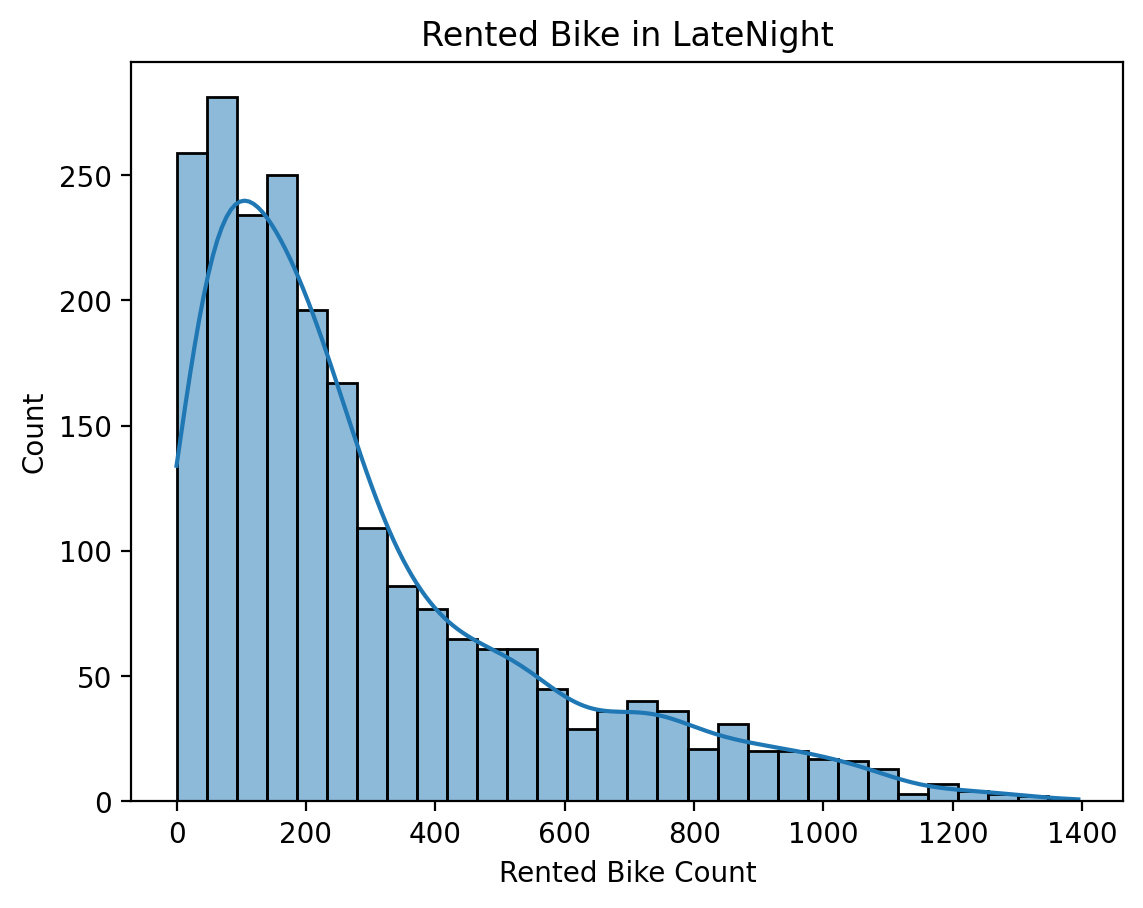

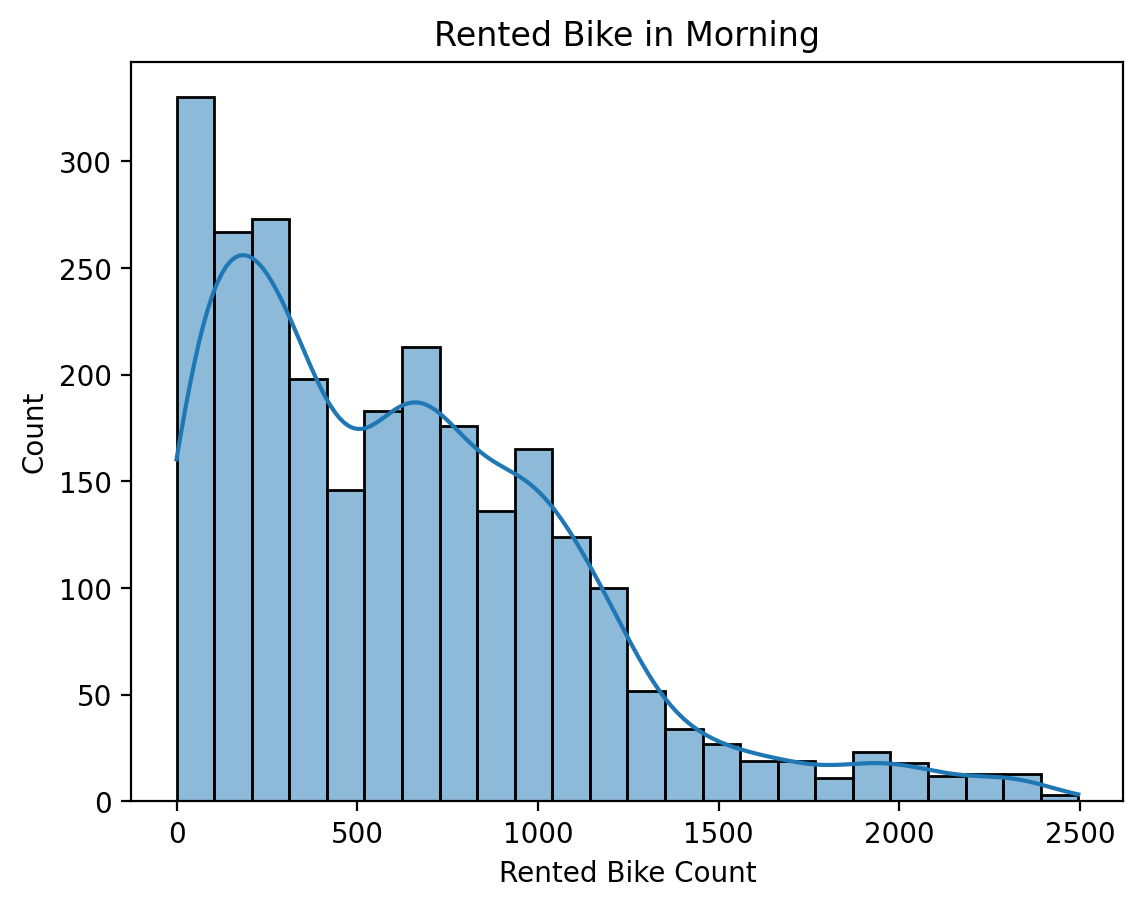

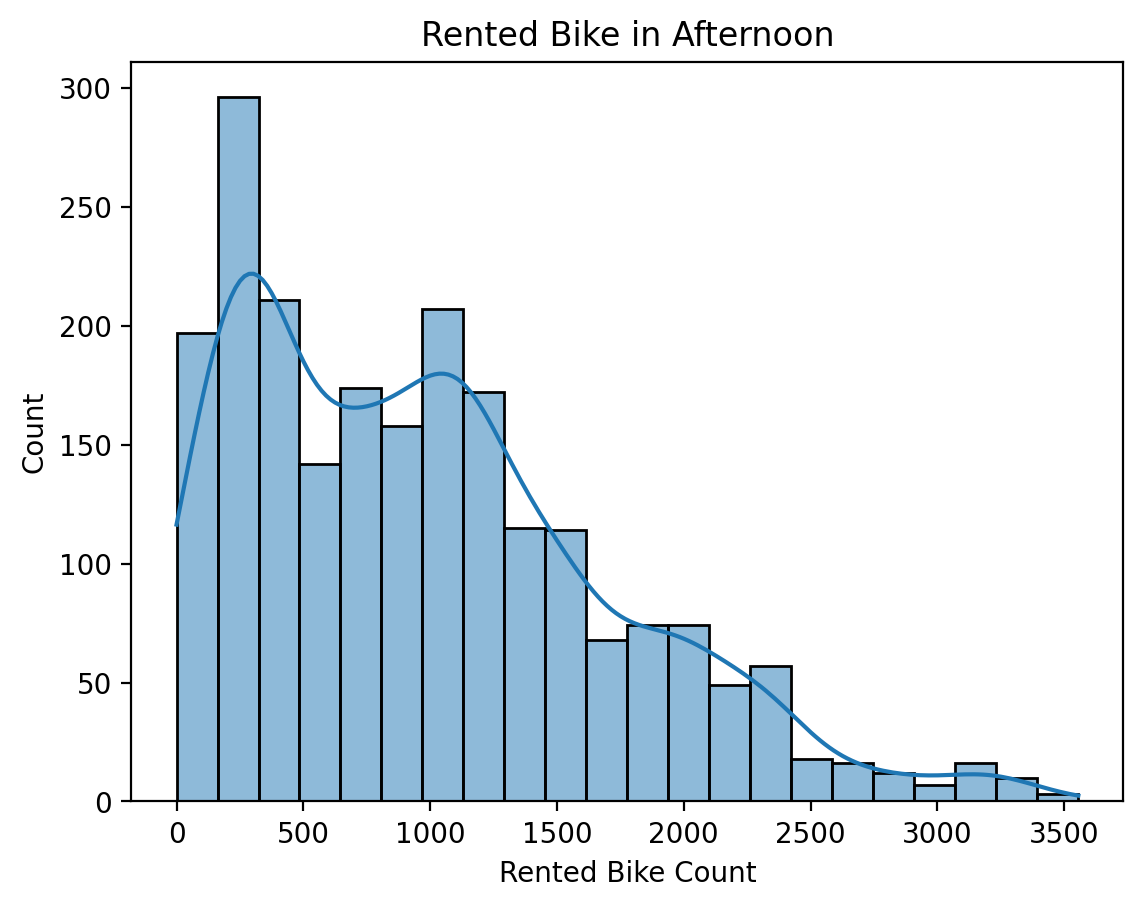

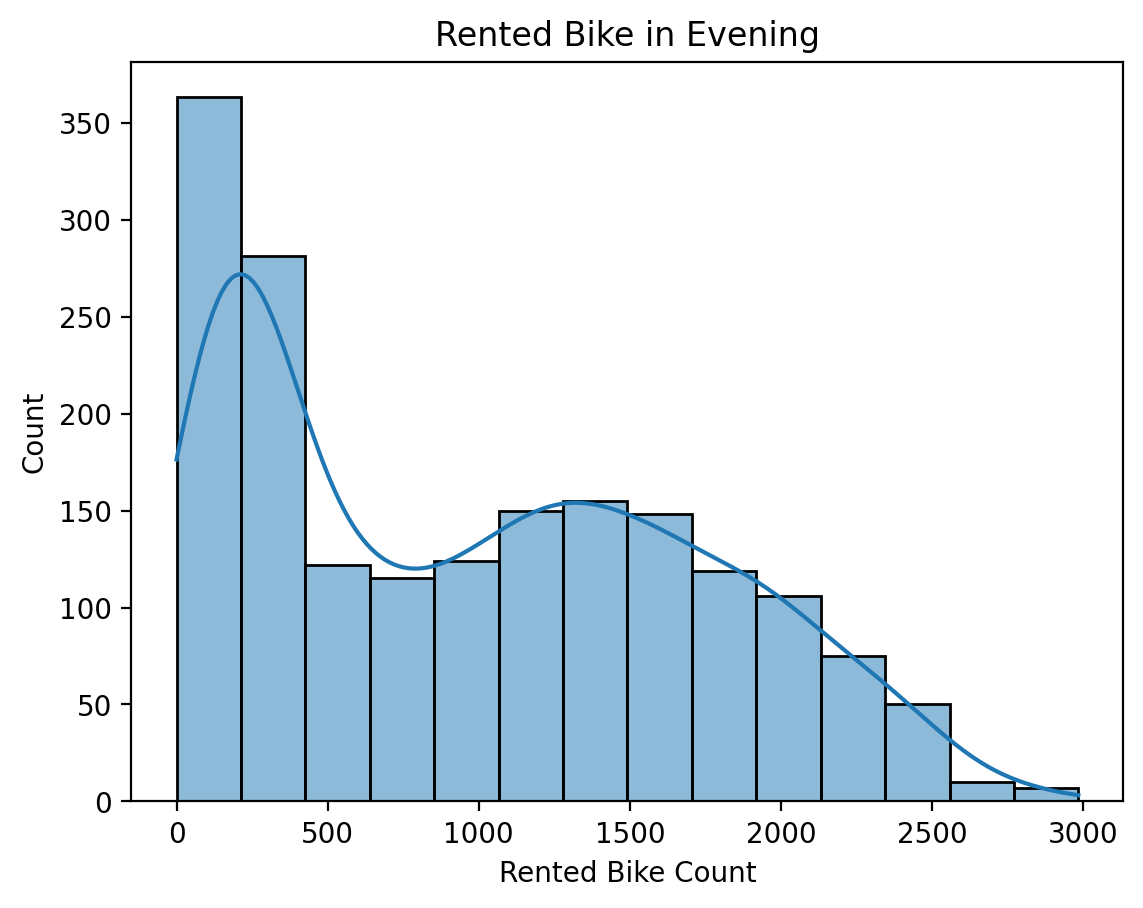

In [66]:
#시간대 별로 나눠서 따릉이 대여량의 히스토그램 그리기 

# LateNight(새벽)의 따릉이 대여량 히스토그램 
sns.histplot(df[df['hourcat']=='LateNight']['Rented Bike Count'],kde=True)
plt.title('Rented Bike in LateNight')
plt.show()

#Morning(아침)의 따릉이 대여량 히스토그램
sns.histplot(df[df['hourcat']=='Morning']['Rented Bike Count'],kde=True)
plt.title('Rented Bike in Morning')
plt.show()

#Afternooon(오후)의 따릉이 대여량 히스토그램 
sns.histplot(df[df['hourcat']=='Afternoon']['Rented Bike Count'],kde=True)
plt.title('Rented Bike in Afternoon')
plt.show()

#Evening( 저녁)의 따릉이 대여량 히스토그램 
sns.histplot(df[df['hourcat']=='Evening']['Rented Bike Count'], kde=True)
plt.title('Rented Bike in Evening')
plt.show()


## 계절 변수

Seasons
Spring     2208
Summer     2208
Autumn     2184
Winter     2160
dtype: int64


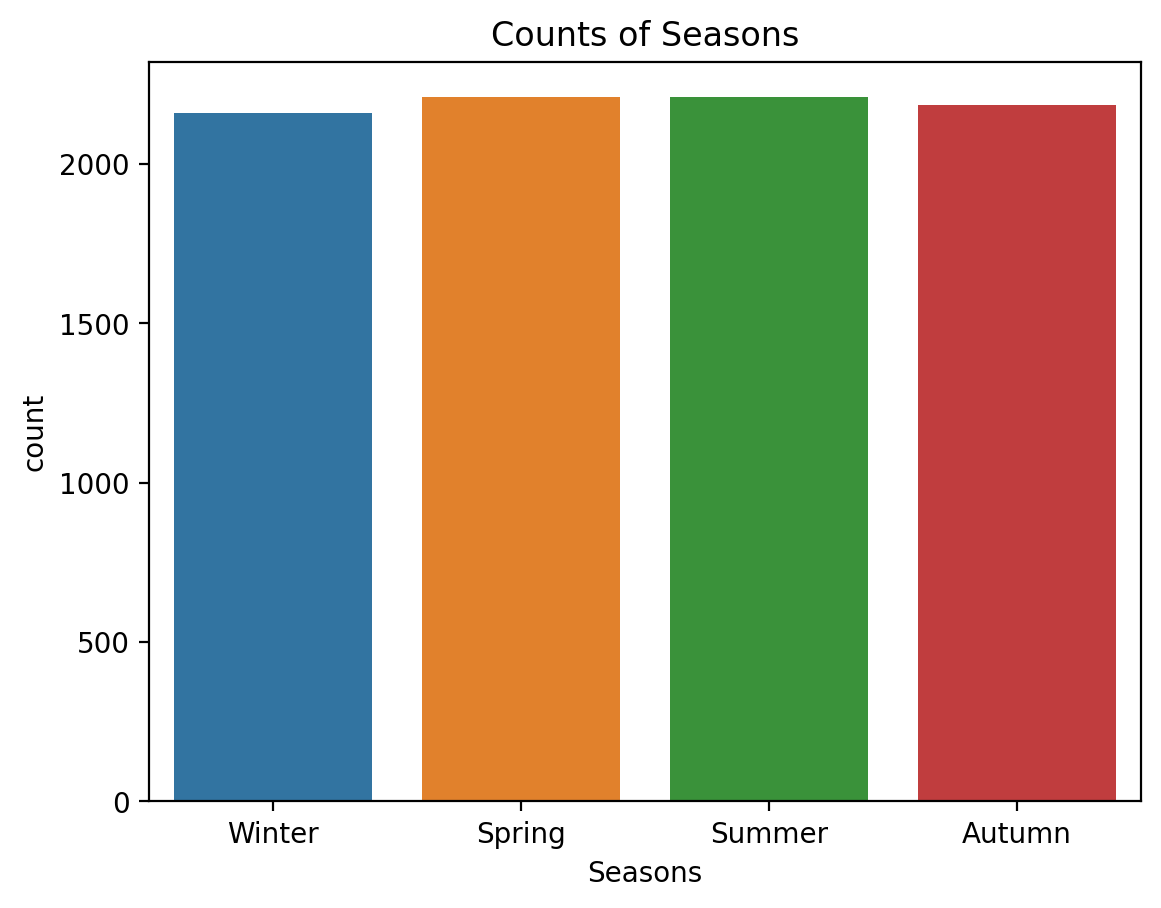

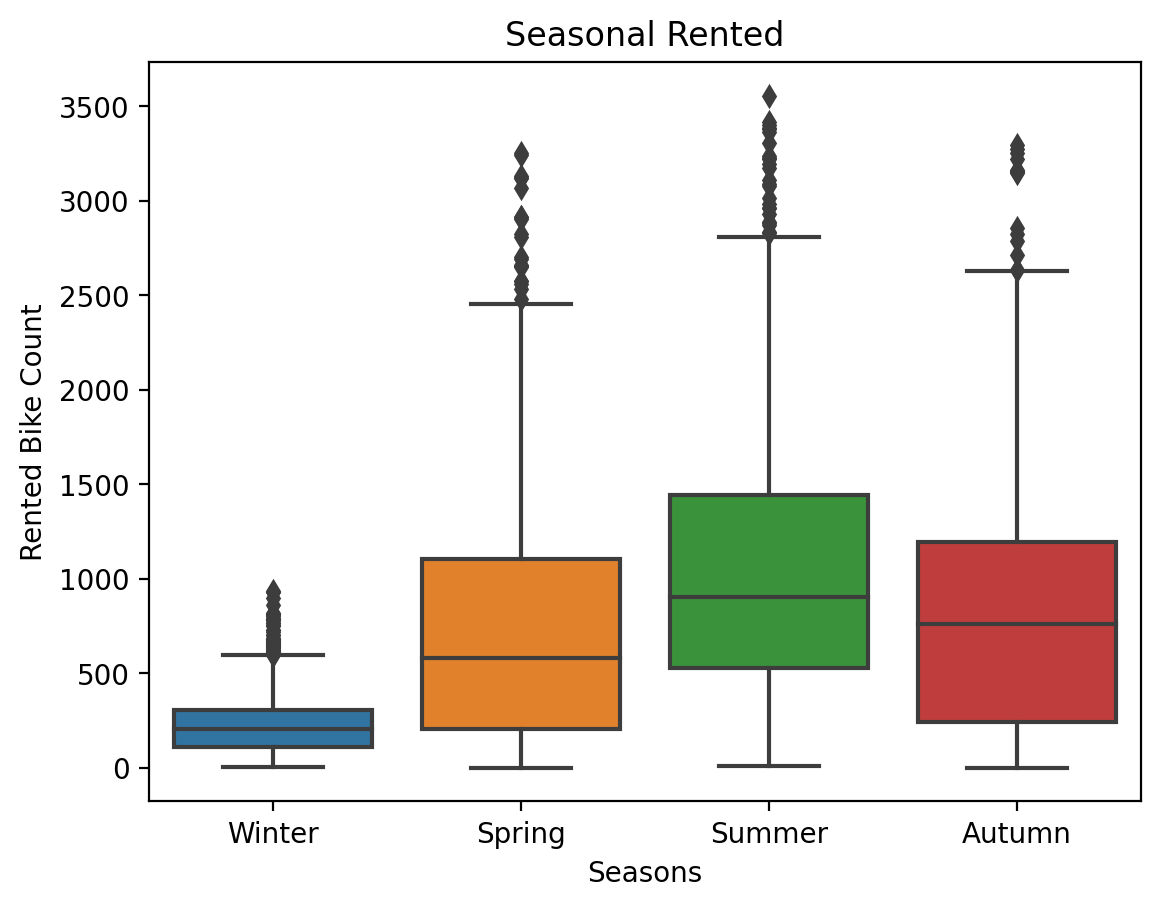

In [67]:
#데이터에서 계절의 수 확인하기 
print(df[['Seasons']].value_counts())
sns.countplot(x='Seasons',data=df)
plt.title('Counts of Seasons')
plt.show()

#계절에 따른 따릉이 대여량 수 확인하기 -boxplot 
sns.boxplot(x='Seasons',y='Rented Bike Count' , data=df)
plt.title('Seasonal Rented')
plt.show()



겨울에 평균 따릉이 대여량의 수가 가장 적고 여름이 가장 많았다

## 휴일 변수

Holiday   
No Holiday    8328
Holiday        432
dtype: int64


<Axes: xlabel='Holiday', ylabel='count'>

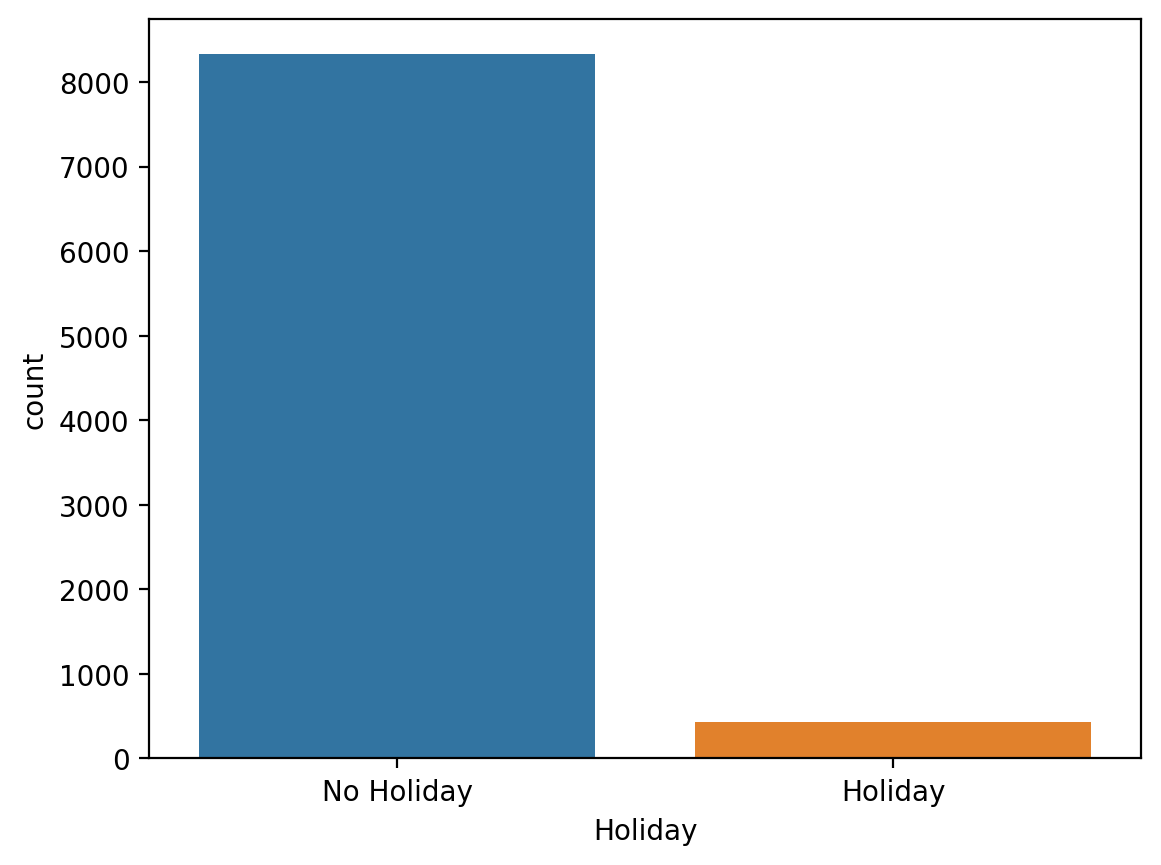

In [62]:
#휴일인 날과 아닌 날의 barplot 그리기
print(df[['Holiday']].value_counts())
sns.countplot(x='Holiday',data=df)

C:\Users\jys72\AppData\Local\Temp\ipykernel_17364\4119614705.py:6: FutureWarning: 

`shade` is now deprecated in favor of `fill`; setting `fill=True`.
This will become an error in seaborn v0.14.0; please update your code.

  sns.kdeplot(x='Rented Bike Count', data=df, hue='Holiday', shade=True )


<Axes: xlabel='Rented Bike Count', ylabel='Density'>

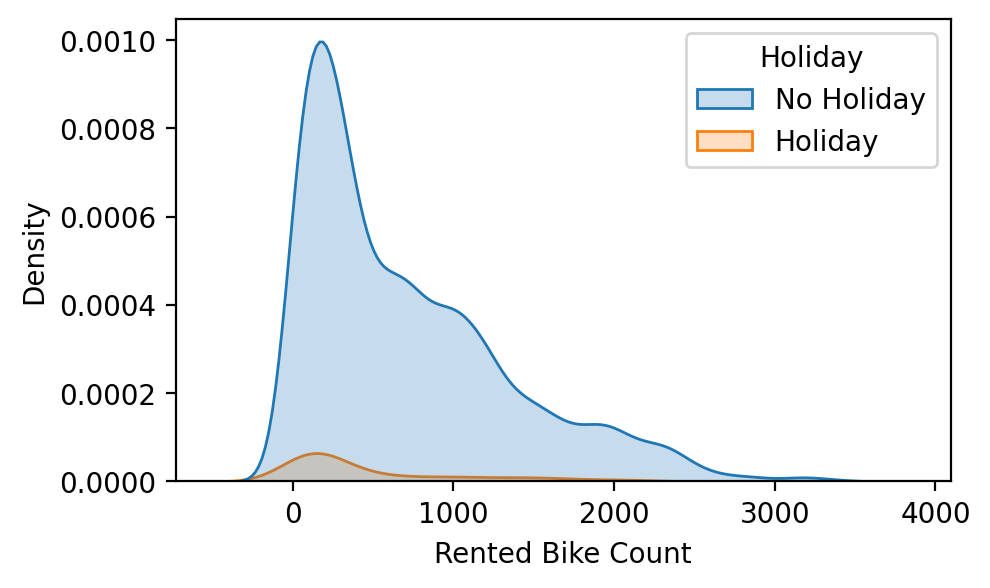

In [7]:
## holiday일때와 no holiday 일때의 따릉이 대여량 히스토그램 분포를 같이 나타내기 

plt.figure(figsize=(5,3))
sns.kdeplot(x='Rented Bike Count', data=df, hue='Holiday', shade=True )



## 비어플 과제 2 - 관심 주제와 데이터 찾기 

### 관심 주제 설명

#### 최근 인터넷 쇼핑이 늘어가고 있는 추세이다. 
##### 따라서 기업에서는 사용자들의 특성을 가지고 잘 팔릴 물건을 예측해야 할 필요성이 증가하고 있다. 
##### 밑의 데이터에 있는 개인들의 특징을 가지고 사용자의 소비를 예측하는 주제에 대해 관심이 생겼다. 


### 데이터셋 

https://www.kaggle.com/datasets/vishakhdapat/customer-segmentation-clustering